# Machine Learning Rangkuman

Created by : Glen V

In this notebook you can see how to do Data Understanding, Cleaning, EDA, and Modeling (Clasification and Regression)

Using custom function, some step will be automated.

What you will find here :

1. Data Understanding
2. Cleaning
3. EDA
4. Machine Learning
  * a. Clasification
  * b. Regression 

User left side Outlier to jump to part you want

<div style="text-align: center;">
  <h1 id='1.-Data-Understanding' style="background-color:rgb(109, 62, 122); color: white; padding: 10px 20px; margin-bottom: 20px; border-radius: 10px; font-weight: bold;">1. Data Understanding</h1>
</div>
<a id="data-understanding"></a>

<div style="text-align: left;">
  <h2 id="loading-data" style="background-color:rgb(56, 0, 69); color: white; padding: 10px 20px; margin-bottom: 20px; border-radius: 8px; font-weight: bold; display: inline-block; font-size: 30px">Loading Data</h2>
</div>

In this part we will loading data using Pandas

In [8]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

pd.options.display.max_rows = 200

In [9]:
file1 = 'dataset/data_saudi_used_cars.csv'
df_reg = pd.read_csv(file1,sep=',') # use sep= "," or ";" if the data not properly exported

file2 = 'dataset/HR_Analytics.csv'
df_class = pd.read_csv(file2,sep=',') # use sep= "," or ";" if the data not properly exported

df_class['Attrition'] = df_class['Attrition'].map({'Yes': True, 'No': False}).astype(bool)
df_class.dropna(inplace=True)


<div style="text-align: left;">
  <h2 id="unique-value" style="background-color:rgb(56, 0, 69); color: white; padding: 10px 20px; margin-bottom: 20px; border-radius: 8px; font-weight: bold; display: inline-block; font-size: 30px">Unique Value</h2>
</div>

we will see all unique data in each column

<div style="display: flex; justify-content: center; margin: 20px 0;">
  <div style="border: 2px solid; border-radius: 8px; padding: 10px 15px; width: fit-content; max-width: 90%;">
    <code><strong>Function to use:</strong> check_all_unique(df)</code>
  </div>
</div>

In [10]:
# Fill this first, it will be used for many function to cleaning and splitting
target_overal = 'Attrition'

In [11]:
# This function check all unique from each column
def check_all_unique(df) :
    pd.set_option('display.max_colwidth', None)
    listItem = []
    for col in df.columns :
        listItem.append( [col, df[col].nunique(), df[col].unique()])

    tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                        data=listItem)
    return tabel1Desc

check_all_unique(df_reg)

Column Name  Number of Unique  \
0          Type               347   
1        Region                27   
2          Make                58   
3     Gear_Type                 2   
4        Origin                 4   
5       Options                 3   
6          Year                50   
7   Engine_Size                71   
8       Mileage              1716   
9    Negotiable                 2   
10        Price               467   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       Unique Sample  
0   [Corolla, Yukon, Range Rover, Optima, FJ, CX3, Cayenne S, Sonata, Avalon, LS, C300, Land Cruiser, Hilux, Tucson, Caprice, Sunny, Pajero, Azera, Focus, 5, Spark, Camry, Pathfinder, Accent, ML, Tahoe, Yaris, Suburban, A, Altima, Traverse, Expedition, Senta fe, Liberty, 3, X, Elantra, Land Cruiser Pickup, VTC, Malibu, The 5, A8, Patrol, Grand Cherokee, SL, Previa, SEL, Aveo, MKZ, Victoria, Datsun, Flex, GLC, ES, Edge, 6, Escalade, Innova, Navara, H1, G80, Carnival, Symbol, Camaro, Accord, Avanza, Land Cruiser 70, Taurus, C5700, Impala, Optra, S, Other, Cerato, Furniture, Murano, Explorer, LX, Pick up, Charger, H6, BT-50, Hiace, Ranger, Fusion, Rav4, Ciocca, CX9, Kona, Sentra, Sierra, Durango, CT-S, Sylvian Bus, Navigator, Opirus, Marquis, The 7, FX, Creta, ...]  
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                [Abha, Riyadh, Hafar Al-Batin, Aseer, Makkah, Dammam, Yanbu, Al-Baha, Jeddah, Hail, Khobar, Al-Ahsa, Jazan, Al-Medina, Al-Namas, Tabouk, Taef, Qassim, Arar, Jubail, Sabya, Al-Jouf, Najran, Wadi Dawasir, Qurayyat, Sakaka, Besha]  
2                                                                                                                                                                                                                                                                                                 [Toyota, GMC, Land Rover, Kia, Mazda, Porsche, Hyundai, Lexus, Chrysler, Chevrolet, Nissan, Mitsubishi, Ford, MG, Mercedes, Jeep, BMW, Audi, Lincoln, Cadillac, Genesis, Renault, Honda, Suzuki, Zhengzhou, Dodge, HAVAL, INFINITI, Isuzu, Changan, Aston Martin, Mercury, Great Wall, Other, Rolls-Royce, MINI, Volkswagen, BYD, Geely, Victory Auto, Classic, Jaguar, Daihatsu, Maserati, Hummer, GAC, Lifan, Bentley, Chery, Peugeot, Foton, Škoda, Fiat, Iveco, SsangYong, FAW, Tata, Ferrari]  
3                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

<div style="text-align: left;">
  <h2 id="shape-and-describe" style="background-color:rgb(56, 0, 69); color: white; padding: 10px 20px; margin-bottom: 20px; border-radius: 8px; font-weight: bold; display: inline-block; font-size: 30px">Shape and Describe</h2>
</div>

We will check shape and describe in one function

<div style="display: flex; justify-content: center; margin: 20px 0;">
  <div style="border: 2px solid; border-radius: 8px; padding: 10px 15px; width: fit-content; max-width: 90%;">
    <code><strong>Function to use:</strong> shape_n_describe(df)</code>
  </div>
</div>

In [12]:
def shape_n_describe(df):
    print(f'This data set contain {df.shape[0]} row and {df.shape[1]} columns')
    print('=============== Detail of each columns ===============')
    print('Numerical Column')
    display(df.describe())
    print('Categorical Column')
    display(df.describe(include=['object', 'category', 'bool']))

shape_n_describe(df_reg)

This data set contain 5624 row and 11 columns
=============== Detail of each columns ===============
Numerical Column


Year  Engine_Size       Mileage          Price
count  5624.000000  5624.000000  5.624000e+03    5624.000000
mean   2014.101885     3.295430  1.509234e+05   53074.058144
std       5.791606     1.515108  3.828360e+05   70155.340614
min    1963.000000     1.000000  1.000000e+02       0.000000
25%    2012.000000     2.000000  3.800000e+04       0.000000
50%    2016.000000     3.000000  1.030000e+05   36500.000000
75%    2018.000000     4.500000  1.960000e+05   72932.500000
max    2022.000000     9.000000  2.000000e+07  850000.000000

Categorical Column


Type  Region    Make  Gear_Type Origin Options Negotiable
count           5624    5624    5624       5624   5624    5624       5624
unique           347      27      58          2      4       3          2
top     Land Cruiser  Riyadh  Toyota  Automatic  Saudi    Full      False
freq             269    2272    1431       4875   4188    2233       3828

<div style="text-align: center;">
  <h1 id='2.-Cleaning' style="background-color:rgb(109, 62, 122); color: white; padding: 10px 20px; margin-bottom: 20px; border-radius: 10px; font-weight: bold;">2. Cleaning</h1>
</div>

<div style="text-align: left;">
  <h2 id="duplicate-and-nan" style="background-color:rgb(56, 0, 69); color: white; padding: 10px 20px; margin-bottom: 20px; border-radius: 8px; font-weight: bold; display: inline-block; font-size: 30px">Duplicate and NaN Data</h2>
</div>

We will check if the data duplicated and contain NaN 

<div style="display: flex; justify-content: center; margin: 20px 0;">
  <div style="border: 2px solid; border-radius: 8px; padding: 10px 15px; width: fit-content; max-width: 90%;">
    Function to use<p><p>
    <code><strong> Duplicate:</strong> check_all_unique(df)</code><p>
    <code><strong> NaN Summary:</strong> check_data_summary(df)</code><p>
    <code><strong> NaN Total:</strong> check_NaN_total(df)</code><p>
    <code><strong> NaN Distribution:</strong> check_NaN_distribution(df)</code><p>

  </div>
</div>

In [13]:
def check_duplicate(df):
    if df.duplicated().sum() > 0:
        total_duplicated = df.duplicated().sum()
        total_percentage_duplicated = round(total_duplicated / df.shape[0] * 100, 2)
        original_data = df.shape[0]
        print(f'Total Duplicated Data: {total_duplicated} rows ({total_percentage_duplicated}% of overall data)')
        duplicated_rows = df[df.duplicated()]
        display(duplicated_rows)

        if total_percentage_duplicated < 1:
            user_input = input("Do you want to delete the duplicated data? (yes/no): ").strip().lower()
            if user_input in ("yes", "y"):
                df.drop_duplicates(inplace=True)
                after_data = df.shape[0]
                print(f'Duplicated data successfully deleted. Total deleted: {original_data - after_data}')
            else:
                print("No action taken. Duplicated data was not deleted.")
        else:
            print("Duplicated data is more than 1% of the dataset. Please check manually.")
        return duplicated_rows.index
    else:
        print("No duplicated data found.")
        return None

In [14]:
duplicated_index = check_duplicate(df_class)

# Now you can manually inspect or handle like:
# df_class.loc[duplicated_index]

Total Duplicated Data: 7 rows (0.49% of overall data)


EmpID  Age AgeGroup  Attrition     BusinessTravel  DailyRate  \
211   RM1468   27    26-35      False      Travel_Rarely        155   
328   RM1461   29    26-35      False      Travel_Rarely        468   
458   RM1464   31    26-35      False         Non-Travel        325   
655   RM1470   34    26-35      False       TravelRarely        628   
954   RM1463   39    36-45      False      Travel_Rarely        722   
1305  RM1469   49    46-55      False  Travel_Frequently       1023   
1336  RM1462   50    46-55       True      Travel_Rarely        410   

                  Department  DistanceFromHome  Education EducationField  \
211   Research & Development                 4          3  Life Sciences   
328   Research & Development                28          4        Medical   
458   Research & Development                 5          3        Medical   
655   Research & Development                 8          3        Medical   
954                    Sales                24          1      Marketing   
1305                   Sales                 2          3        Medical   
1336                   Sales                28          3      Marketing   

      EmployeeCount  EmployeeNumber  EnvironmentSatisfaction  Gender  \
211               1            2064                        2    Male   
328               1            2054                        4  Female   
458               1            2057                        2    Male   
655               1            2068                        2    Male   
954               1            2056                        2  Female   
1305              1            2065                        4    Male   
1336              1            2055                        4    Male   

      HourlyRate  JobInvolvement  JobLevel                 JobRole  \
211           87               4         2  Manufacturing Director   
328           73               2         1      Research Scientist   
458           74               3         2  Manufacturing Director   
655           82               4         2   Laboratory Technician   
954           60               2         4         Sales Executive   
1305          63               2         2         Sales Executive   
1336          39               2         3         Sales Executive   

      JobSatisfaction MaritalStatus  MonthlyIncome SalarySlab  MonthlyRate  \
211                 2       Married           6142     5k-10k         5174   
328                 1        Single           3785    Upto 5k         8489   
458                 1        Single           9936     5k-10k         3787   
655                 3       Married           4404    Upto 5k        10228   
954                 4       Married          12031    10k-15k         8828   
1305                2       Married           5390     5k-10k        13243   
1336                1      Divorced          10854    10k-15k        16586   

      NumCompaniesWorked Over18 OverTime  PercentSalaryHike  \
211                    1      Y      Yes                 20   
328                    1      Y       No                 14   
458                    0      Y       No                 19   
655                    2      Y       No                 12   
954                    0      Y       No                 11   
1305                   2      Y       No                 14   
1336                   4      Y      Yes                 13   

      PerformanceRating  RelationshipSatisfaction  StandardHours  \
211                   4                         2             80   
328                   3                         2             80   
458                   3                         2             80   
655                   3                         1             80   
954                   3                         1             80   
1305                  3                         4             80   
1336                  3                         2             80   

      StockOptio

No action taken. Duplicated data was not deleted.


In [15]:
def check_data_summary(df):
    # Create DataFrame for NaN summary
    nan_summary = pd.DataFrame({
        'Total NaN': df.isna().sum(),
        'Percentage NaN': round(df.isna().sum() / df.shape[0] * 100, 2),
        'Non-Null Count': df.notnull().sum(),
        'Data Type': df.dtypes
    })

    nan_summary = nan_summary.reset_index().rename(columns={'index': 'Column Name'})
    nan_df = nan_summary.sort_values(by='Percentage NaN', ascending=False)
    print('=============== Data Summary ===============')
    display(nan_df)
    return nan_df

nan = check_data_summary(df_reg)

=============== Data Summary ===============


Column Name  Total NaN  Percentage NaN  Non-Null Count Data Type
0          Type          0             0.0            5624    object
1        Region          0             0.0            5624    object
2          Make          0             0.0            5624    object
3     Gear_Type          0             0.0            5624    object
4        Origin          0             0.0            5624    object
5       Options          0             0.0            5624    object
6          Year          0             0.0            5624     int64
7   Engine_Size          0             0.0            5624   float64
8       Mileage          0             0.0            5624     int64
9    Negotiable          0             0.0            5624      bool
10        Price          0             0.0            5624     int64

In [16]:
# Show how much NaN in each column
def check_NaN_total(df):
    percentage_nan = pd.DataFrame({
    'Total NaN': df.isna().sum(),
    'Percentage' : round(df.isna().sum()/df.shape[0]*100)
    })
    print('=============== Total NaN in each column ===============')
    display(percentage_nan.sort_values(by='Percentage',ascending=False))

check_NaN_total(df_reg)

=============== Total NaN in each column ===============


Total NaN  Percentage
Type                 0         0.0
Region               0         0.0
Make                 0         0.0
Gear_Type            0         0.0
Origin               0         0.0
Options              0         0.0
Year                 0         0.0
Engine_Size          0         0.0
Mileage              0         0.0
Negotiable           0         0.0
Price                0         0.0

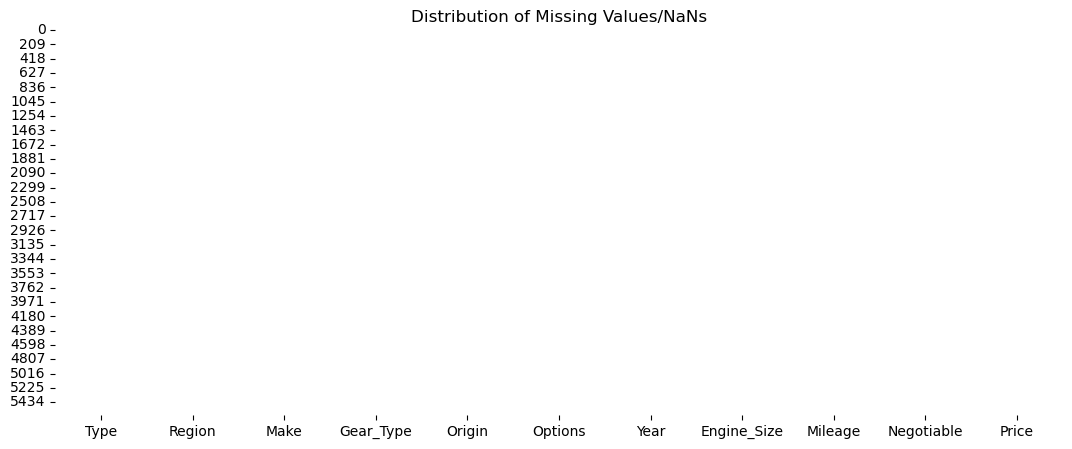

Found 0 rows with inconsistent Missing Values: []


In [17]:
# Distribution of Missing Value/NaN 
def check_NaN_distribution(df):
    plt.figure(figsize=(13,5))
    plt.title('Distribution of Missing Values/NaNs')
    sns.heatmap(df[df.columns].isna(),cbar=False, cmap=sns.color_palette(["white", "red"]))
    plt.show()

    # Filter columns that contain NaNs
    cols_with_nan = df.isna().sum()[df.isna().sum() > 0].index

    # Create a list of Boolean Series indicating where NaNs are
    nan_masks = [df[col].isna() for col in cols_with_nan]

    # Loop through each row and check if the NaNs align
    misaligned_rows = []

    for index, row in df.iterrows():
        # Use .loc[index] to get boolean for this row
        row_alignment = [mask.loc[index] for mask in nan_masks]

        if len(set(row_alignment)) > 1:  # If some columns are NaN and some are not
            misaligned_rows.append(index)

    # Check if NaN values appear together in the same row
    print(f"Found {len(misaligned_rows)} rows with inconsistent Missing Values: {misaligned_rows}")

check_NaN_distribution(df_reg)

<div style="text-align: left;">
  <h2 id="how-duplicate-and-nan" style="background-color:rgb(56, 0, 69); color: white; padding: 10px 20px; margin-bottom: 20px; border-radius: 8px; font-weight: bold; display: inline-block; font-size: 30px">How to Cleaning</h2>
</div>

How to cleaning, change type, date time, how to fill with median, reference from other dataset using merge

In [18]:
# Create DataFrame
df = pd.DataFrame({
    'Year': ['2020', '2019', '2018', 'not a year', '2021'],
    'Price': ['10000', '15000.50', 'invalid', '20000', '30000'],
    'Negotiable': ['Yes', 'No', 'Yes', 'No', 'Yes'],
    'Type': ['Sedan', 'SUV', 'Truck', 'Sedan', 'Convertible']
})

<div style="text-align: middle;">
  <h3 id="change-type" style="background-color:rgb(32, 1, 39); color: white; padding: 10px 10px; margin-bottom: 10px; border-radius: 8px; font-weight: bold; display: inline-block; font-size: 20px">Changing Data Type</h3>
</div>

In [19]:
# All type of astype : 'int64', 'float64', 'bool', 'object', 'category', 'datetime64[ns]','timedelta64[ns]'
# df = df.astype({'Year': 'datetime64[ns]', 'Price': 'float'}) # if you want to edit all at once

# Example: Clean types in one go
df['Year'] = pd.to_numeric(df['Year'], errors='coerce') #coerce make error value to become NaN
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['Negotiable'] = df['Negotiable'].map({'Yes': True, 'No': False}).astype(bool)
df['Type'] = pd.Categorical(df['Type'])
df

Year    Price  Negotiable         Type
0  2020.0  10000.0        True        Sedan
1  2019.0  15000.5       False          SUV
2  2018.0      NaN        True        Truck
3     NaN  20000.0       False        Sedan
4  2021.0  30000.0        True  Convertible

In [20]:
# Create DataFrame
df = pd.DataFrame({
    'Date': pd.date_range(start='2024-01-01', periods=10, freq='M')  # 10 months, end of each month
.astype('object')
})

# For handling date time like column
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df['Month_Name'] = df['Date'].dt.month_name()
df['Month_Name_3'] = df['Date'].dt.strftime('%b')
df

Date  Month Month_Name Month_Name_3
0 2024-01-31      1    January          Jan
1 2024-02-29      2   February          Feb
2 2024-03-31      3      March          Mar
3 2024-04-30      4      April          Apr
4 2024-05-31      5        May          May
5 2024-06-30      6       June          Jun
6 2024-07-31      7       July          Jul
7 2024-08-31      8     August          Aug
8 2024-09-30      9  September          Sep
9 2024-10-31     10    October          Oct

<div style="text-align: middle;">
  <h3 id="fill-nan" style="background-color:rgb(32, 1, 39); color: white; padding: 10px 10px; margin-bottom: 10px; border-radius: 8px; font-weight: bold; display: inline-block; font-size: 20px">Fill NaN with Median/Mean</h3>
</div>

In [21]:
# Example DataFrame
df = pd.DataFrame(data = {
    'Type': ['Sedan', 'SUV', 'Sedan', 'Truck', 'SUV', 'Truck'],
    'Price': [10000, np.nan, 12000, 15000, np.nan, np.nan]
})

# Fill NaN based on the median price of each Type
df['Price'] = df.groupby('Type')['Price'].transform(lambda x: x.fillna(x.median())) # change to mean() if you want


<div style="text-align: middle;">
  <h3 id="merge-cleaning" style="background-color:rgb(32, 1, 39); color: white; padding: 10px 10px; margin-bottom: 10px; border-radius: 8px; font-weight: bold; display: inline-block; font-size: 20px">Merge</h3>
</div>

In [22]:
# First DataFrame
df1 = pd.DataFrame({
    'ID': [1, 2, 3],
    'Name': ['Alice', 'Bob', 'Charlie']
})

# Second DataFrame
df2 = pd.DataFrame({
    'ID': [1, 2, 4],
    'Age': [25, 30, 22]
})

# Merge on 'ID' column
merged_df = pd.merge(df1, df2, on='ID', how='left')

merged_df

ID     Name   Age
0   1    Alice  25.0
1   2      Bob  30.0
2   3  Charlie   NaN

<div style="text-align: middle;">
  <h3 id="export-clean-data" style="background-color:rgb(32, 1, 39); color: white; padding: 10px 10px; margin-bottom: 10px; border-radius: 8px; font-weight: bold; display: inline-block; font-size: 20px">Exporting Clean Data</h3>
</div>

In [23]:
# df.to_csv('dataset.csv',index=False)

<div style="text-align: center;">
  <h1 id='3.-Explanatory-Data-Analysis' style="background-color:rgb(109, 62, 122); color: white; padding: 10px 20px; margin-bottom: 20px; border-radius: 10px; font-weight: bold;">3. Explanatory Data Analysis</h1>
</div>
<a id="exploratory-data-analysis"></a>

<div style="text-align: left;">
  <h2 id="EDA-numerical" style="background-color:rgb(56, 0, 69); color: white; padding: 10px 20px; margin-bottom: 20px; border-radius: 8px; font-weight: bold; display: inline-block; font-size: 30px">Numerical Columns</h2>
</div>

In this part we will automate EDA for Numerical Columns

<div style="display: flex; justify-content: center; margin: 20px 0;">
  <div style="border: 2px solid; border-radius: 8px; padding: 10px 15px; width: fit-content; max-width: 90%;">
    <code><strong>Function to use:</strong> plot_numerical_boxplots(df, drop_cols=[], num_cols=5)</code>
  </div>
</div>

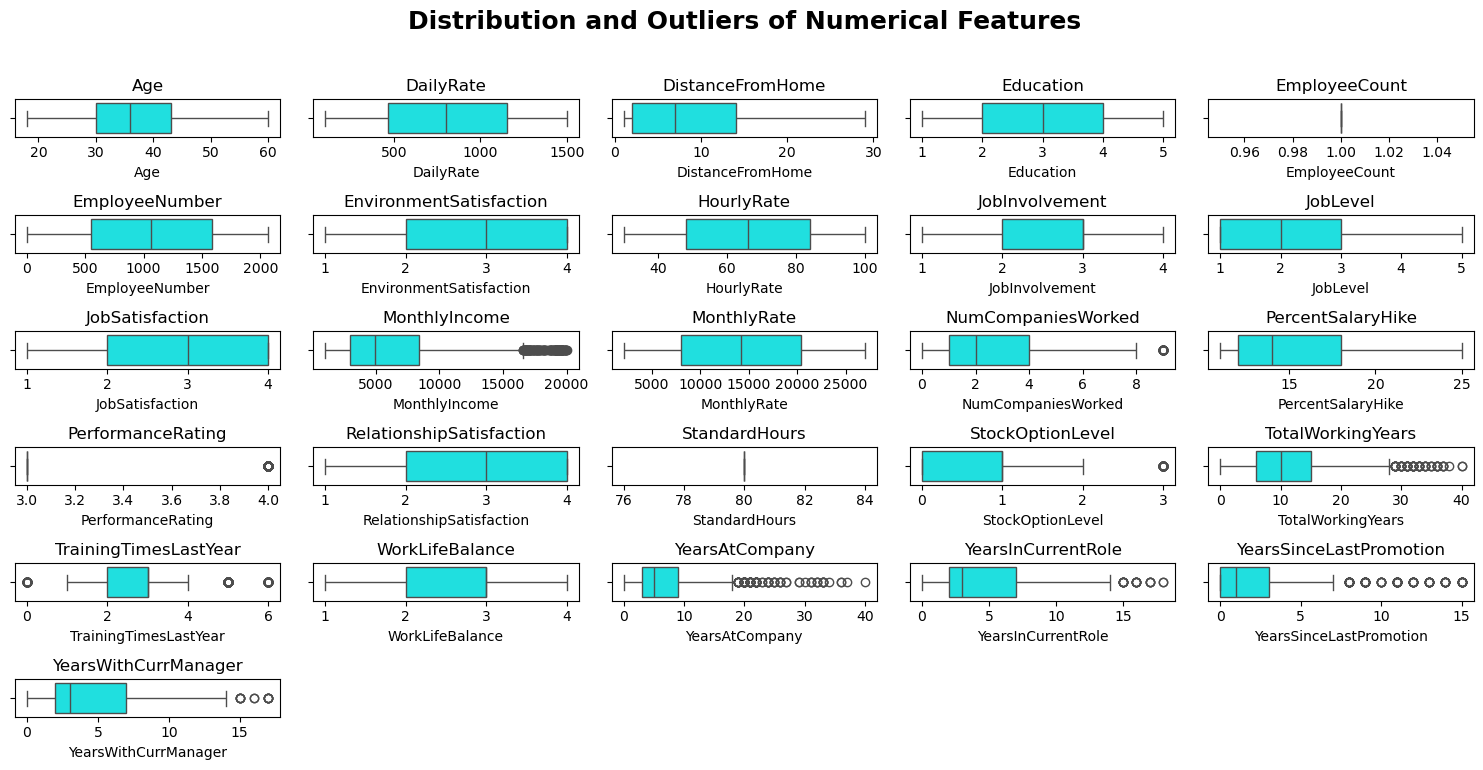

In [24]:
def plot_numerical_boxplots(df, drop_cols=None, num_cols=5, figsize=(15, 7.5), title='Distribution and Outliers of Numerical Features'):
    """
    Plots boxplots of numerical features from a DataFrame.

    Parameters:
    - df: DataFrame
    - drop_cols: List of columns to drop before selecting numerical columns
    - num_cols: Number of plots per row
    - figsize: Size of the full figure
    - title: Title for the full plot
    """
    if drop_cols is None:
        drop_cols = []

    # Select numerical columns
    numerical_cols = df.drop(columns=drop_cols).select_dtypes(include=['number']).columns
    num_rows = int(np.ceil(len(numerical_cols) / num_cols))

    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=figsize)
    axes = axes.flatten()

    for i, col in enumerate(numerical_cols):
        sns.boxplot(data=df, x=col, ax=axes[i], color='cyan')
        axes[i].set_title(col, fontsize=12)

    # Turn off any empty subplots
    for ax in axes[len(numerical_cols):]:
        ax.axis('off')

    # Add a big title
    fig.suptitle(title, fontsize=18, fontweight='bold', y=1.02)
    
    plt.tight_layout()
    plt.show()
    
plot_numerical_boxplots(df_class, drop_cols=[], num_cols=5)


<div style="text-align: middle;">
  <h3 id="normality-test" style="background-color:rgb(32, 1, 39); color: white; padding: 10px 10px; margin-bottom: 10px; border-radius: 8px; font-weight: bold; display: inline-block; font-size: 20px">Normality Test</h3>
</div>

We will check normality of distribution for each column, this will affect how we check correlation.

If data normal use pearson, if not normal use spearman

<div style="display: flex; justify-content: center; margin: 20px 0;">
  <div style="border: 2px solid; border-radius: 8px; padding: 10px 15px; width: fit-content; max-width: 90%;">
    <code><strong>Function to use:</strong> plot_normality_tests(df, drop_cols=[], num_cols=5)</code>
  </div>
</div>

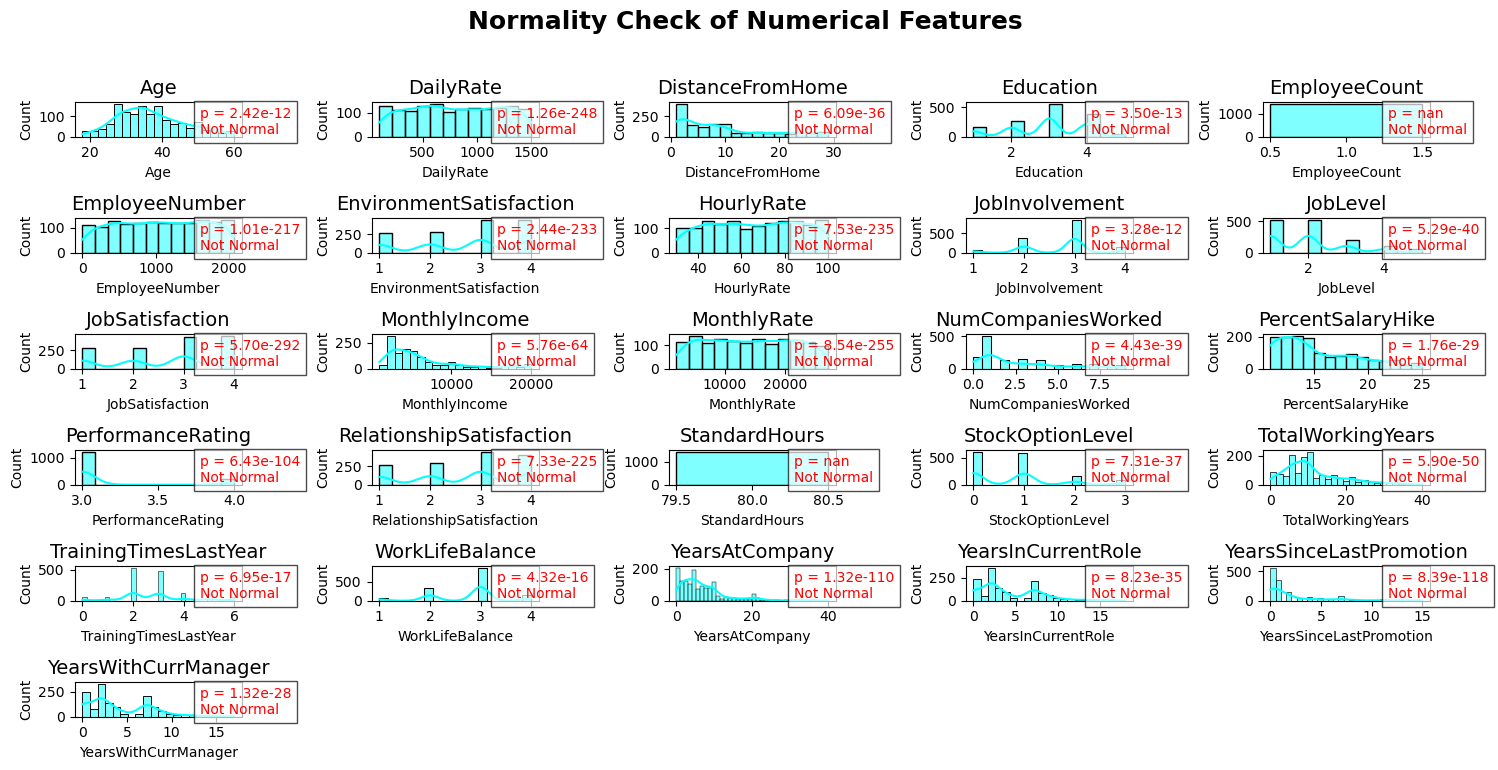

Normally distributed columns: []


In [25]:
from scipy.stats import normaltest

def plot_normality_tests(df, drop_cols=None, num_cols=5, figsize=(15, 7.5), title='Normality Check of Numerical Features'):
    """
    Plots histograms with KDE and normality test results for numerical columns.

    Parameters:
    - df: DataFrame
    - drop_cols: List of columns to drop before selecting numerical columns
    - num_cols: Number of plots per row
    - figsize: Size of the full figure
    - title: Title for the full plot
    """
    if drop_cols is None:
        drop_cols = []

    # Select numerical columns
    numerical_cols = df.drop(columns=drop_cols).select_dtypes(include=['number']).columns
    num_rows = int(np.ceil(len(numerical_cols) / num_cols))

    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=figsize)
    axes = axes.flatten()

    normal_columns = []

    for i, col in enumerate(numerical_cols):
        sns.histplot(data=df, x=col, ax=axes[i], color='cyan', kde=True)
        axes[i].set_title(col, fontsize=14)

        # Perform normality test
        stat, p_value = normaltest(df[col])

        # Conclusion
        conclusion = "Normal" if p_value >= 0.05 else "Not Normal"
        if conclusion == "Normal":
            normal_columns.append(col)

        # Annotate result
        axes[i].annotate(
            f"p = {p_value:.2e}\n{conclusion}",
            xy=(0.75, 0.08), xycoords='axes fraction',
            fontsize=10, color='red', bbox=dict(facecolor='white', alpha=0.7)
        )

    # Hide unused subplots
    for ax in axes[len(numerical_cols):]:
        ax.axis('off')

    fig.suptitle(title, fontsize=18, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()
    return normal_columns

normal_cols = plot_normality_tests(df_class, drop_cols=[], num_cols=5)
print("Normally distributed columns:", normal_cols)

In [26]:
from scipy import stats
from scipy.stats import normaltest

stats.zscore(df_class['Age']).sort_values()

# If score above 3 or below 3 is outlier

0      -2.07278
1      -2.07278
2      -2.07278
3      -2.07278
4      -2.07278
         ...   
1477    2.52736
1478    2.52736
1475    2.52736
1476    2.52736
1479    2.52736
Name: Age, Length: 1423, dtype: float64

<div style="text-align: middle;">
  <h3 id="correlation-test" style="background-color:rgb(32, 1, 39); color: white; padding: 10px 10px; margin-bottom: 10px; border-radius: 8px; font-weight: bold; display: inline-block; font-size: 20px">Correlation Test</h3>
</div>

If data normal use pearson, if not normal use spearman

<div style="display: flex; justify-content: center; margin: 20px 0;">
  <div style="border: 2px solid; border-radius: 8px; padding: 10px 15px; width: fit-content; max-width: 90%;">
    <code><strong>Function to use:</strong>  find_highly_correlated_features(df_class, drop_cols=[],threshold=0.6, 
method='spearman')</code>
  </div>
</div>

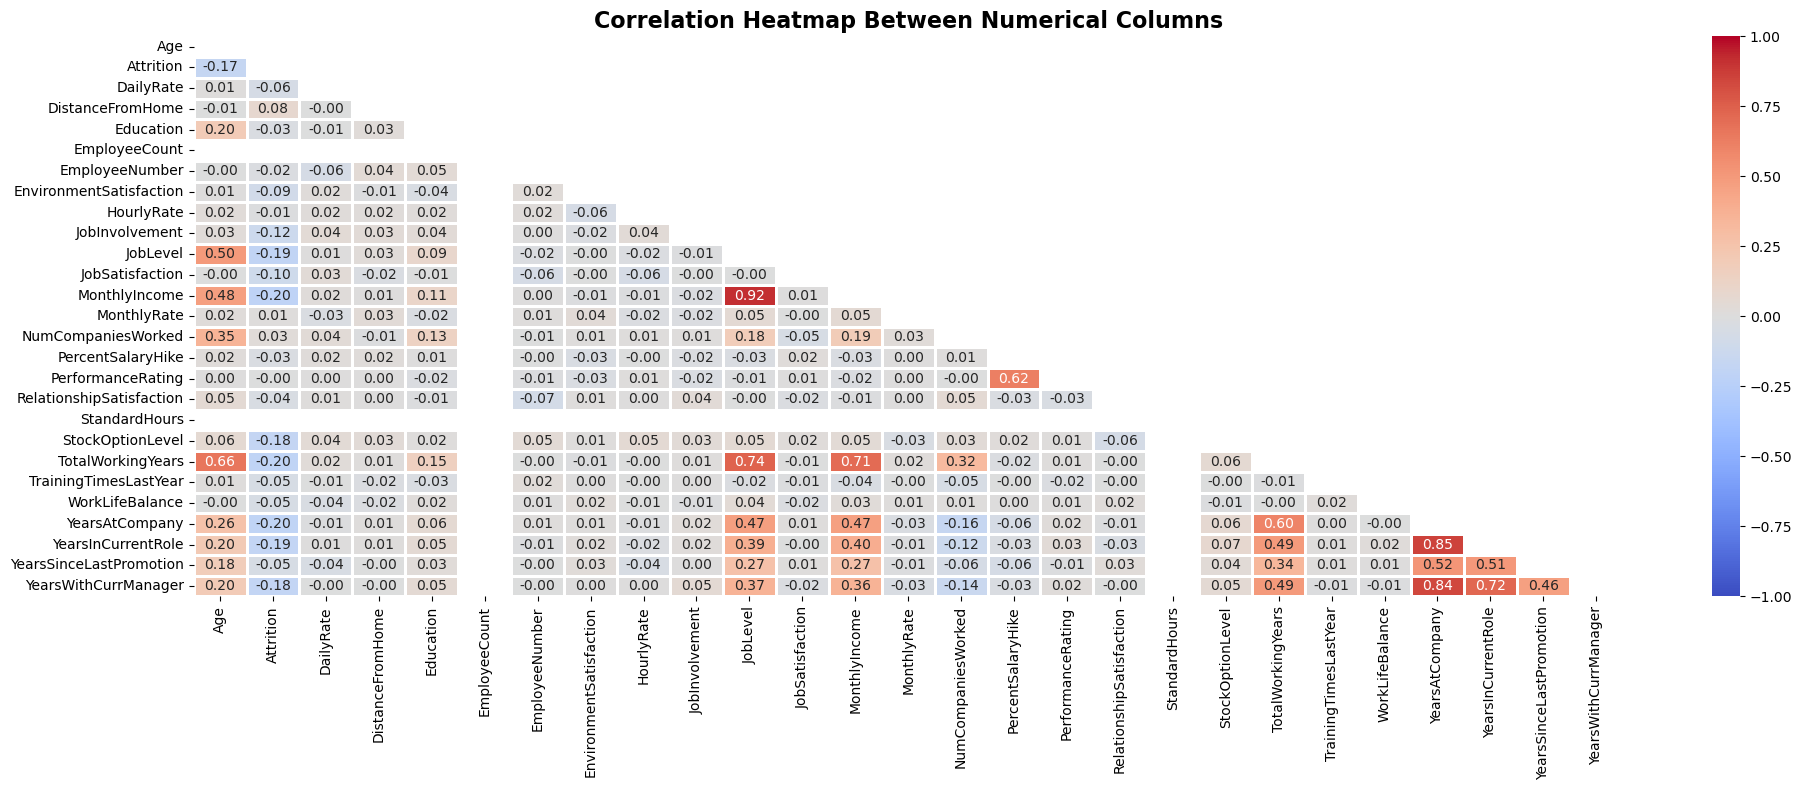

==== List of Highly Correlated ====
MonthlyIncome and JobLevel — correlation = 0.92
YearsInCurrentRole and YearsAtCompany — correlation = 0.85
YearsWithCurrManager and YearsAtCompany — correlation = 0.84
TotalWorkingYears and JobLevel — correlation = 0.74
YearsWithCurrManager and YearsInCurrentRole — correlation = 0.72
TotalWorkingYears and MonthlyIncome — correlation = 0.71
TotalWorkingYears and Age — correlation = 0.66
PerformanceRating and PercentSalaryHike — correlation = 0.62


In [27]:
def find_highly_correlated_features(df, drop_cols=None, threshold=0.6, method='spearman'):
    """
    Find pairs of numerical features with correlation higher than a specified threshold
    and show the correlation heatmap.

    Parameters:
    - df: DataFrame
    - drop_cols: List of columns to drop before correlation (e.g., target columns like 'Attrition')
    - threshold: Correlation threshold to consider features highly correlated
    - method: Correlation method ('pearson', 'spearman', or 'kendall')

    Returns:
    - A sorted list of tuples: (Feature 1, Feature 2, Correlation Value)
    """

    if drop_cols is None:
        drop_cols = []

    # Drop specified columns and select numeric types
    corr_df = df.drop(columns=drop_cols).corr(numeric_only=True, method=method)

    # Create a mask for the lower triangle (exclude self-correlation on diagonal)
    mask = np.tril(np.ones(corr_df.shape), k=-1).astype(bool)

    # Find pairs above the threshold
    high_corr_pairs = [
        (col, row, corr_df.loc[row, col])
        for col in corr_df.columns
        for row in corr_df.index
        if mask[corr_df.columns.get_loc(col), corr_df.index.get_loc(row)] and
           pd.notnull(corr_df.loc[row, col]) and abs(corr_df.loc[row, col]) > threshold
    ]

    # Sort by correlation value descending
    high_corr_pairs = sorted(high_corr_pairs, key=lambda x: abs(x[2]), reverse=True)   
     
    # Plot heatmap
    plt.figure(figsize=(20, 8))
    sns.heatmap(
        corr_df, vmin=-1, vmax=1, center=0,
        cmap='coolwarm', mask=~mask,  # mask the upper triangle + diagonal
        annot=True, fmt=".2f", linewidths=1, linecolor='white'
    )
    plt.xticks(rotation=90)
    plt.title("Correlation Heatmap Between Numerical Columns", fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()
    # Show results
    print('==== List of Highly Correlated ====')
    for feat1, feat2, corr_value in high_corr_pairs:
        print(f"{feat1} and {feat2} — correlation = {corr_value:.2f}")
    return high_corr_pairs

# Example
high_corr_features = find_highly_correlated_features(
    df_class, 
    drop_cols=[], 
    threshold=0.6, # Above 0.6 categorized as high
    method='spearman' # use pearson if data normaly distributed
)

<div style="text-align: middle;">
  <h3 id="VIF" style="background-color:rgb(32, 1, 39); color: white; padding: 10px 10px; margin-bottom: 10px; border-radius: 8px; font-weight: bold; display: inline-block; font-size: 20px">Variance Inflation Factor</h3>
</div>

When we modeling we need to check if the numerical columns is VIF or related to other column. if the column related above 4 we need to remove it. So it will not create a bias. We need to remove one by one.

General limit is 4-5, above 5 potential, above 10 serius multicollinearity.

<div style="display: flex; justify-content: center; margin: 20px 0;">
  <div style="border: 2px solid; border-radius: 8px; padding: 10px 15px; width: fit-content; max-width: 90%;">
    <code><strong>Function to use:</strong>  fVIF_test(df,limit=4.5)</code>
  </div>
</div>



In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def VIF_test(df,limit=4.5) :
    '''
    Check and remove all column that above certain limit
    Parameters:
    - df: Your dataframe
    - limit: Orginal 4.5 (You can change it)
    
    '''
    features = df.select_dtypes(include=np.number)  # Include only relevant features
    vif_data = pd.DataFrame()
    vif_data["Feature"] = features.columns
    vif_data["VIF"] = [variance_inflation_factor(features.values, i) for i in range(len(features.columns))]

    list_of_above_4 = {}

    while True :
        if vif_data.iloc[0,1]>limit:
            list_of_above_4.update({vif_data.iloc[0,0]:vif_data.iloc[0,1]})
            features = features.drop(columns=[vif_data.iloc[0,0]])
            vif_data = pd.DataFrame()
            vif_data["Feature"] = features.columns
            vif_data["VIF"] = [variance_inflation_factor(features.values, i) for i in range(len(features.columns))]
        else :
            print(f'Final Result All Feature Below FIV : {limit}')
            print(f'Column Above : {list(list_of_above_4.keys())}')
            display(vif_data)
            break
    return list_of_above_4

results_vif = VIF_test(df_reg,limit=4.5)

<div style="text-align: left;">
  <h2 id="EDA-categorical" style="background-color:rgb(56, 0, 69); color: white; padding: 10px 20px; margin-bottom: 20px; border-radius: 8px; font-weight: bold; display: inline-block; font-size: 30px">Categorical Columns</h2>
</div>

In this part we will automate EDA for Categorical Columns

<div style="text-align: middle;">
  <h3 id="correlation-test-classification" style="background-color:rgb(32, 1, 39); color: white; padding: 10px 10px; margin-bottom: 10px; border-radius: 8px; font-weight: bold; display: inline-block; font-size: 20px">Clasification</h3>
</div>

This function use chisquare to check corelation for categorical and categorial.

<div style="display: flex; justify-content: center; margin: 20px 0;">
  <div style="border: 2px solid; border-radius: 8px; padding: 10px 15px; width: fit-content; max-width: 90%;">
    <code><strong>Function to use:</strong> analyze_categorical_relationships(df, 
                                          target_col=target_overal, 
                                          drop_cols=[''],
                                          significance_level=0.05)</code>
  </div>
</div>

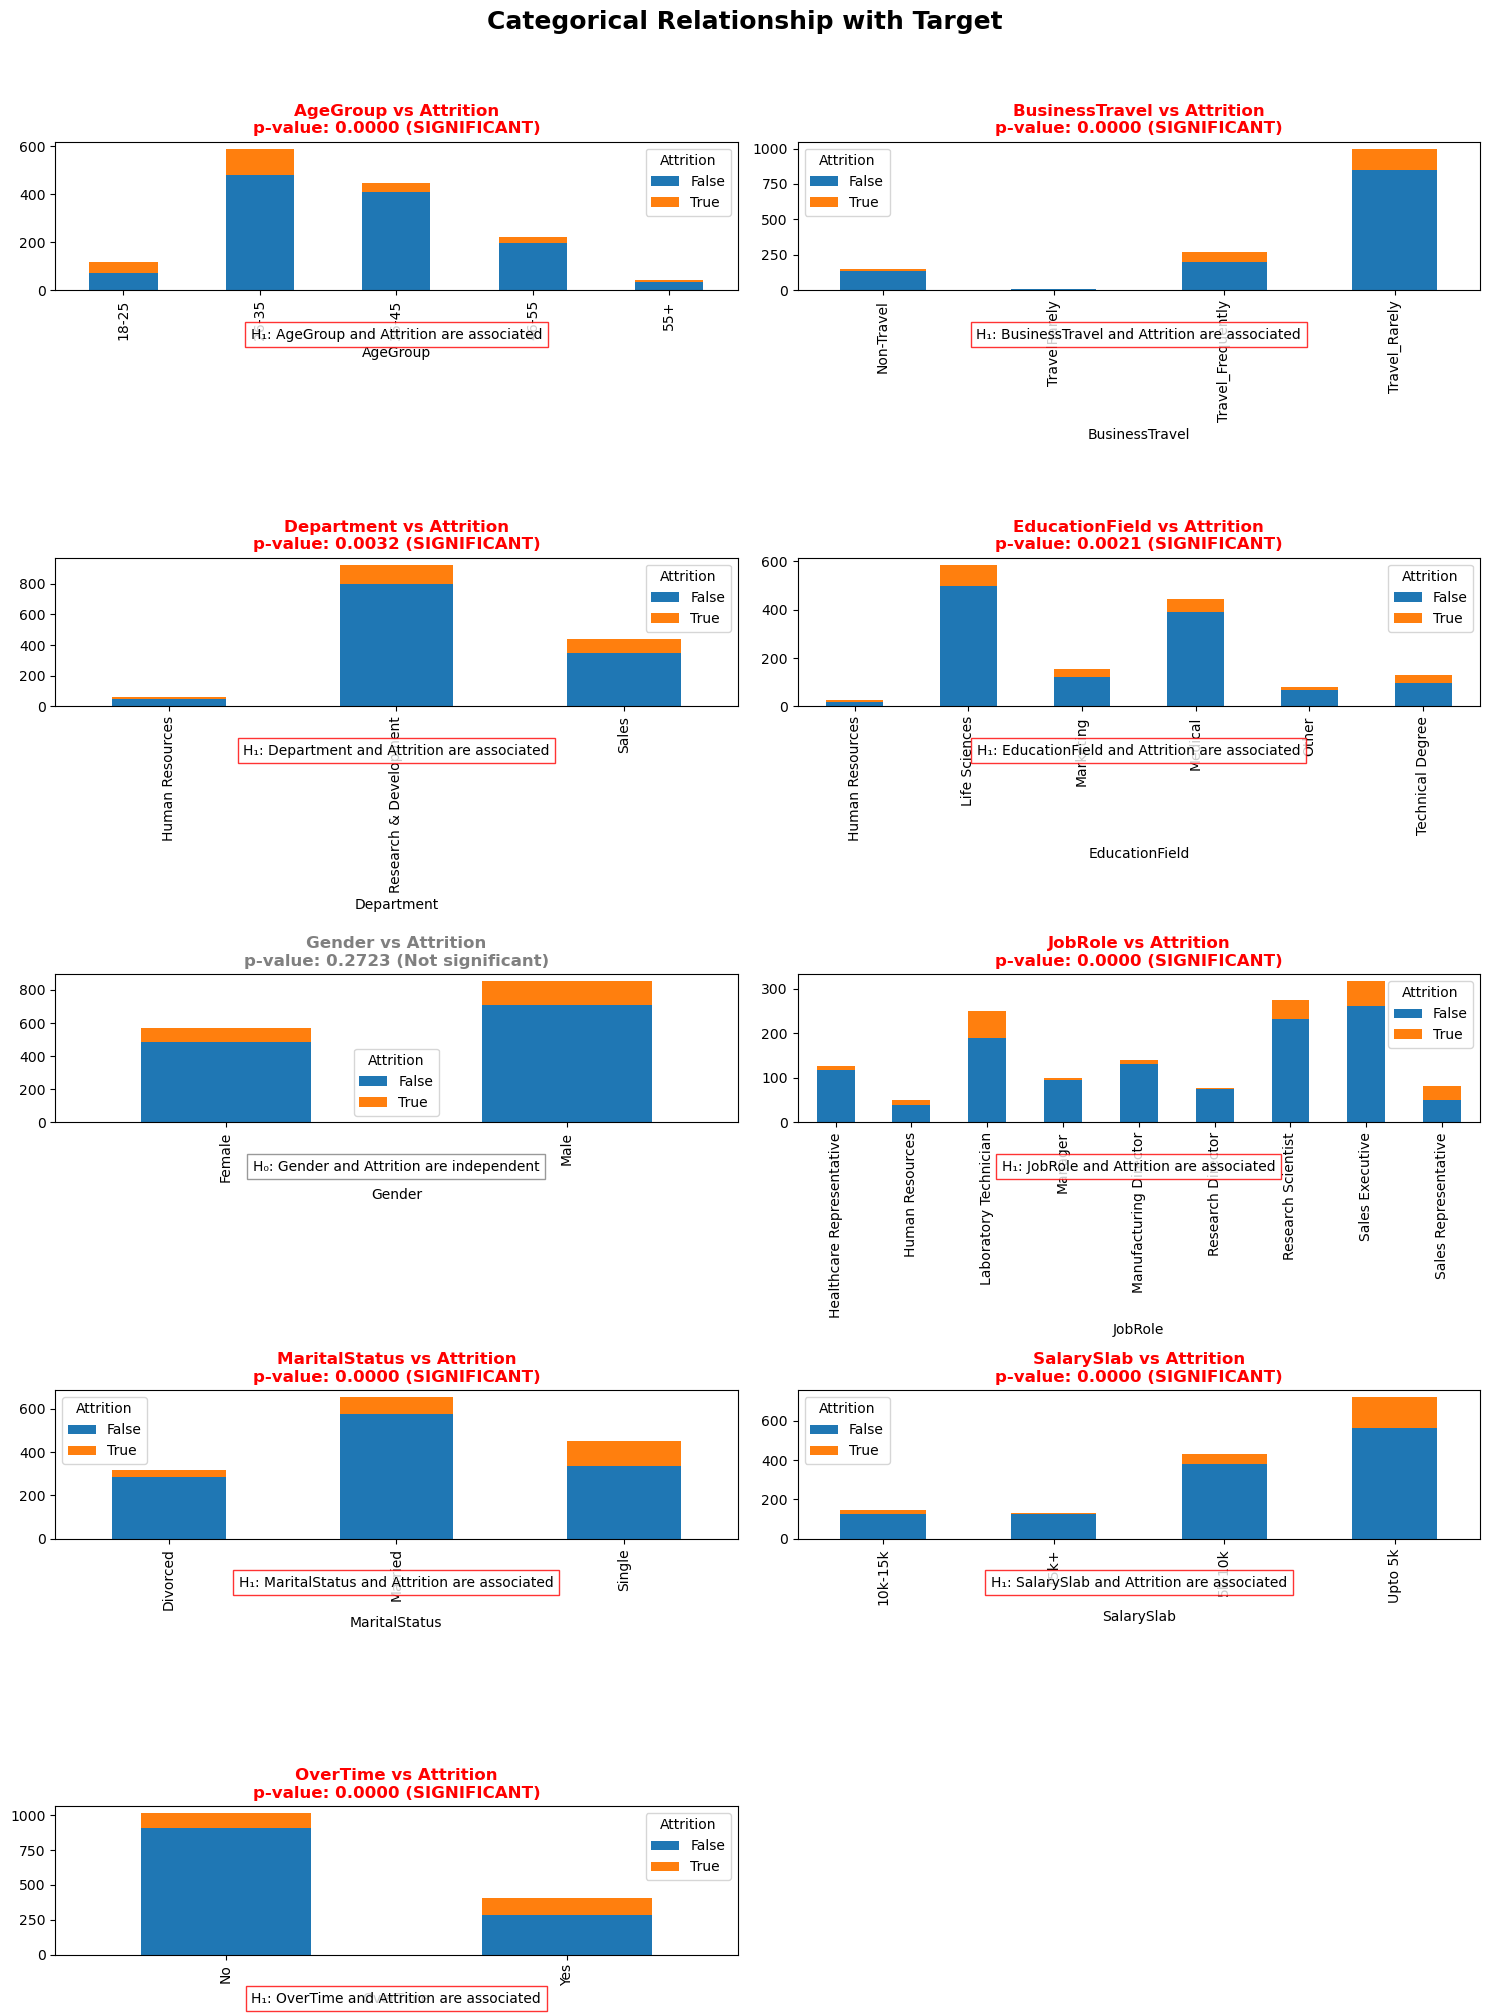


SUMMARY OF STATISTICAL ANALYSIS

Significant features affecting Attrition (p < 0.05):
['AgeGroup', 'BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus', 'SalarySlab', 'OverTime']


In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from IPython.display import display
import math

def analyze_categorical_relationships(df, target_col=target_overal, drop_cols=['EmpID'], 
                                    significance_level=0.05, figsize=(15, 20)):
    """
    Analyze relationships between categorical columns and a target column using Chi-Square tests.
    Visualizes all results in a single figure with subplots, showing only H1 for significant
    and H0 for non-significant results.
    
    Parameters:
    - df: DataFrame to analyze
    - target_col: Target column for analysis (default 'Attrition')
    - drop_cols: Columns to exclude from analysis (default ['EmpID'])
    - significance_level: Threshold for statistical significance (default 0.05)
    - figsize: Size of the combined figure (default (15, 20))
    
    Returns:
    - Dictionary with results including significant features and their percentages
    """
    
    def calculate_percentage(df, column, target):
        df_test = df.groupby(column)[target].value_counts().unstack().fillna(0)

        target_classes = df[target].dropna().unique()
        if len(target_classes) != 2:
            raise ValueError(f"Target column '{target}' must have exactly 2 unique values, but found: {target_classes}")

        positive_class = target_classes[1]  # Choose the second class as "positive" (you can swap if needed)
        negative_class = target_classes[0]

        df_test["Percentage"] = round((df_test[positive_class] / (df_test[positive_class] + df_test[negative_class])) * 100, 2)

        return df_test.sort_values(by='Percentage', ascending=False)

    
    # Initialize results storage
    results = {
        'significant_features': [],
        'all_tests': {},
        'percentages': {}
    }
    
    # Select categorical columns
    categorical_cols = df.select_dtypes(include=['object', 'category','bool']).columns
    categorical_cols = [col for col in categorical_cols 
                       if col not in drop_cols and col != target_col and df[col].nunique() > 1]
    
    # Calculate grid size for subplots
    n_cols = 2
    n_rows = math.ceil(len(categorical_cols) / n_cols)
    
    # Create figure
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    axes = axes.flatten()
    
    for idx, col in enumerate(categorical_cols):
        ax = axes[idx]
        
        # Create contingency table
        contingency_table = df.groupby(col)[target_col].value_counts().unstack().fillna(0)
        
        # Perform Chi-Square Test
        chi2, p_value, dof, expected = chi2_contingency(contingency_table)
        
        # Determine significance
        is_significant = p_value < significance_level
        sig_color = 'red' if is_significant else 'gray'
        sig_text = "SIGNIFICANT" if is_significant else "Not significant"
        
        # Plot contingency table
        contingency_table.plot(kind='bar', stacked=True, ax=ax)
        
        # Add title with p-value and significance
        title = f"{col} vs {target_col}\n"
        title += f"p-value: {p_value:.4f} ({sig_text})"
        ax.set_title(title, color=sig_color, fontweight='bold')
        
        # Add only the relevant hypothesis to plot
        hypothesis_text = (f"H₁: {col} and {target_col} are associated" if is_significant 
                          else f"H₀: {col} and {target_col} are independent")
        
        ax.text(0.5, -0.25, hypothesis_text, transform=ax.transAxes,
                ha='center', va='top', fontsize=10, 
                bbox=dict(facecolor='white', alpha=0.8, edgecolor=sig_color))
        
        # Store results
        test_result = {
            'p_value': p_value,
            'is_significant': is_significant,
            'contingency_table': contingency_table,
            'null_hypothesis': f"H₀: {col} and {target_col} are independent",
            'alternative_hypothesis': f"H₁: {col} and {target_col} are associated"
        }
        results['all_tests'][col] = test_result
        
        # If significant, store details
        if is_significant:
            results['significant_features'].append(col)
            percentages = calculate_percentage(df, col, target_col)
            results['percentages'][col] = percentages
    
    # Hide unused axes
    fig.suptitle('Categorical Relationship with Target', fontsize=18, fontweight='bold', y=1.02)

    for idx in range(len(categorical_cols), len(axes)):
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # Print summary
    print("\n" + "="*60)
    print("SUMMARY OF STATISTICAL ANALYSIS")
    print("="*60)
    print(f"\nSignificant features affecting {target_col} (p < {significance_level}):")
    print(results['significant_features'])
    
    return results

# Example usage:
results = analyze_categorical_relationships(df_class, 
                                          target_col=target_overal, 
                                          drop_cols=['EmpID', 'OtherColumn'], # drop column you don't want to check here
                                          significance_level=0.05) # standard is 5%, change it accordingly



In [29]:
from IPython.display import display, HTML

def side_by_side(df_list, titles=None, space=5, table_width="350px", container_height="auto"):
    """
    Display multiple DataFrames side by side with horizontal scroll
    
    Parameters:
    - df_list: List of DataFrames to display
    - titles: List of titles for each DataFrame (optional)
    - space: Spacing between tables in pixels
    - table_width: Width of each individual table
    - container_height: Height of the scrolling container (default auto)
    """
    if titles is None:
        titles = [""] * len(df_list)
    
    html = f'<div style="overflow-x: auto; white-space: nowrap; height:{container_height}; padding-bottom:10px;">'
    
    for df, title in zip(df_list, titles):
        html += f"""
        <div style="display:inline-block; vertical-align:top; margin-right:{space}px; width:{table_width}">
            <h4 style="text-align:center">{title}</h4>
            {df.to_html()}
        </div>
        """
    
    html += '</div>'
    display(HTML(html))


def show_significant_percentages(results, target_label=target_overal, space=5):
    """
    Display significant feature percentages side-by-side based on chi-square results.

    Parameters:
    - results: Dictionary containing 'significant_features' and 'percentages'
    - target_label: Label to use in the titles (default: 'Attrition')
    - space: Spacing between tables in pixels
    """
    if 'significant_features' in results and len(results['significant_features']) > 0:
        df_list = [results['percentages'][feat] for feat in results['significant_features']]
        titles = [f"{target_label} by {feat}" for feat in results['significant_features']]
        
        side_by_side(df_list, titles=titles, space=space)
        
        print("\nYou can access individual tables with:")
        print("results['percentages']['FeatureName']")
        print("Available features:", results['significant_features'])
    else:
        print("No significant features found.")
show_significant_percentages(results, target_label=target_overal)


You can access individual tables with:
results['percentages']['FeatureName']
Available features: ['AgeGroup', 'BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus', 'SalarySlab', 'OverTime']


<div style="text-align: middle;">
  <h3 id="correlation-test-regression" style="background-color:rgb(32, 1, 39); color: white; padding: 10px 10px; margin-bottom: 10px; border-radius: 8px; font-weight: bold; display: inline-block; font-size: 20px">Regression</h3>
</div>

This function use chisquare to check corelation for categorical and numerical.

<div style="display: flex; justify-content: center; margin: 20px 0;">
  <div style="border: 2px solid; border-radius: 8px; padding: 10px 15px; width: fit-content; max-width: 90%;">
    <code><strong>Function to use:</strong> detect_difference_by_category(df_reg,target_col='Price',normality='not_normal',max_categories=10) <p> # Change to 'normal' for ANOVA</code>
  </div>
</div>

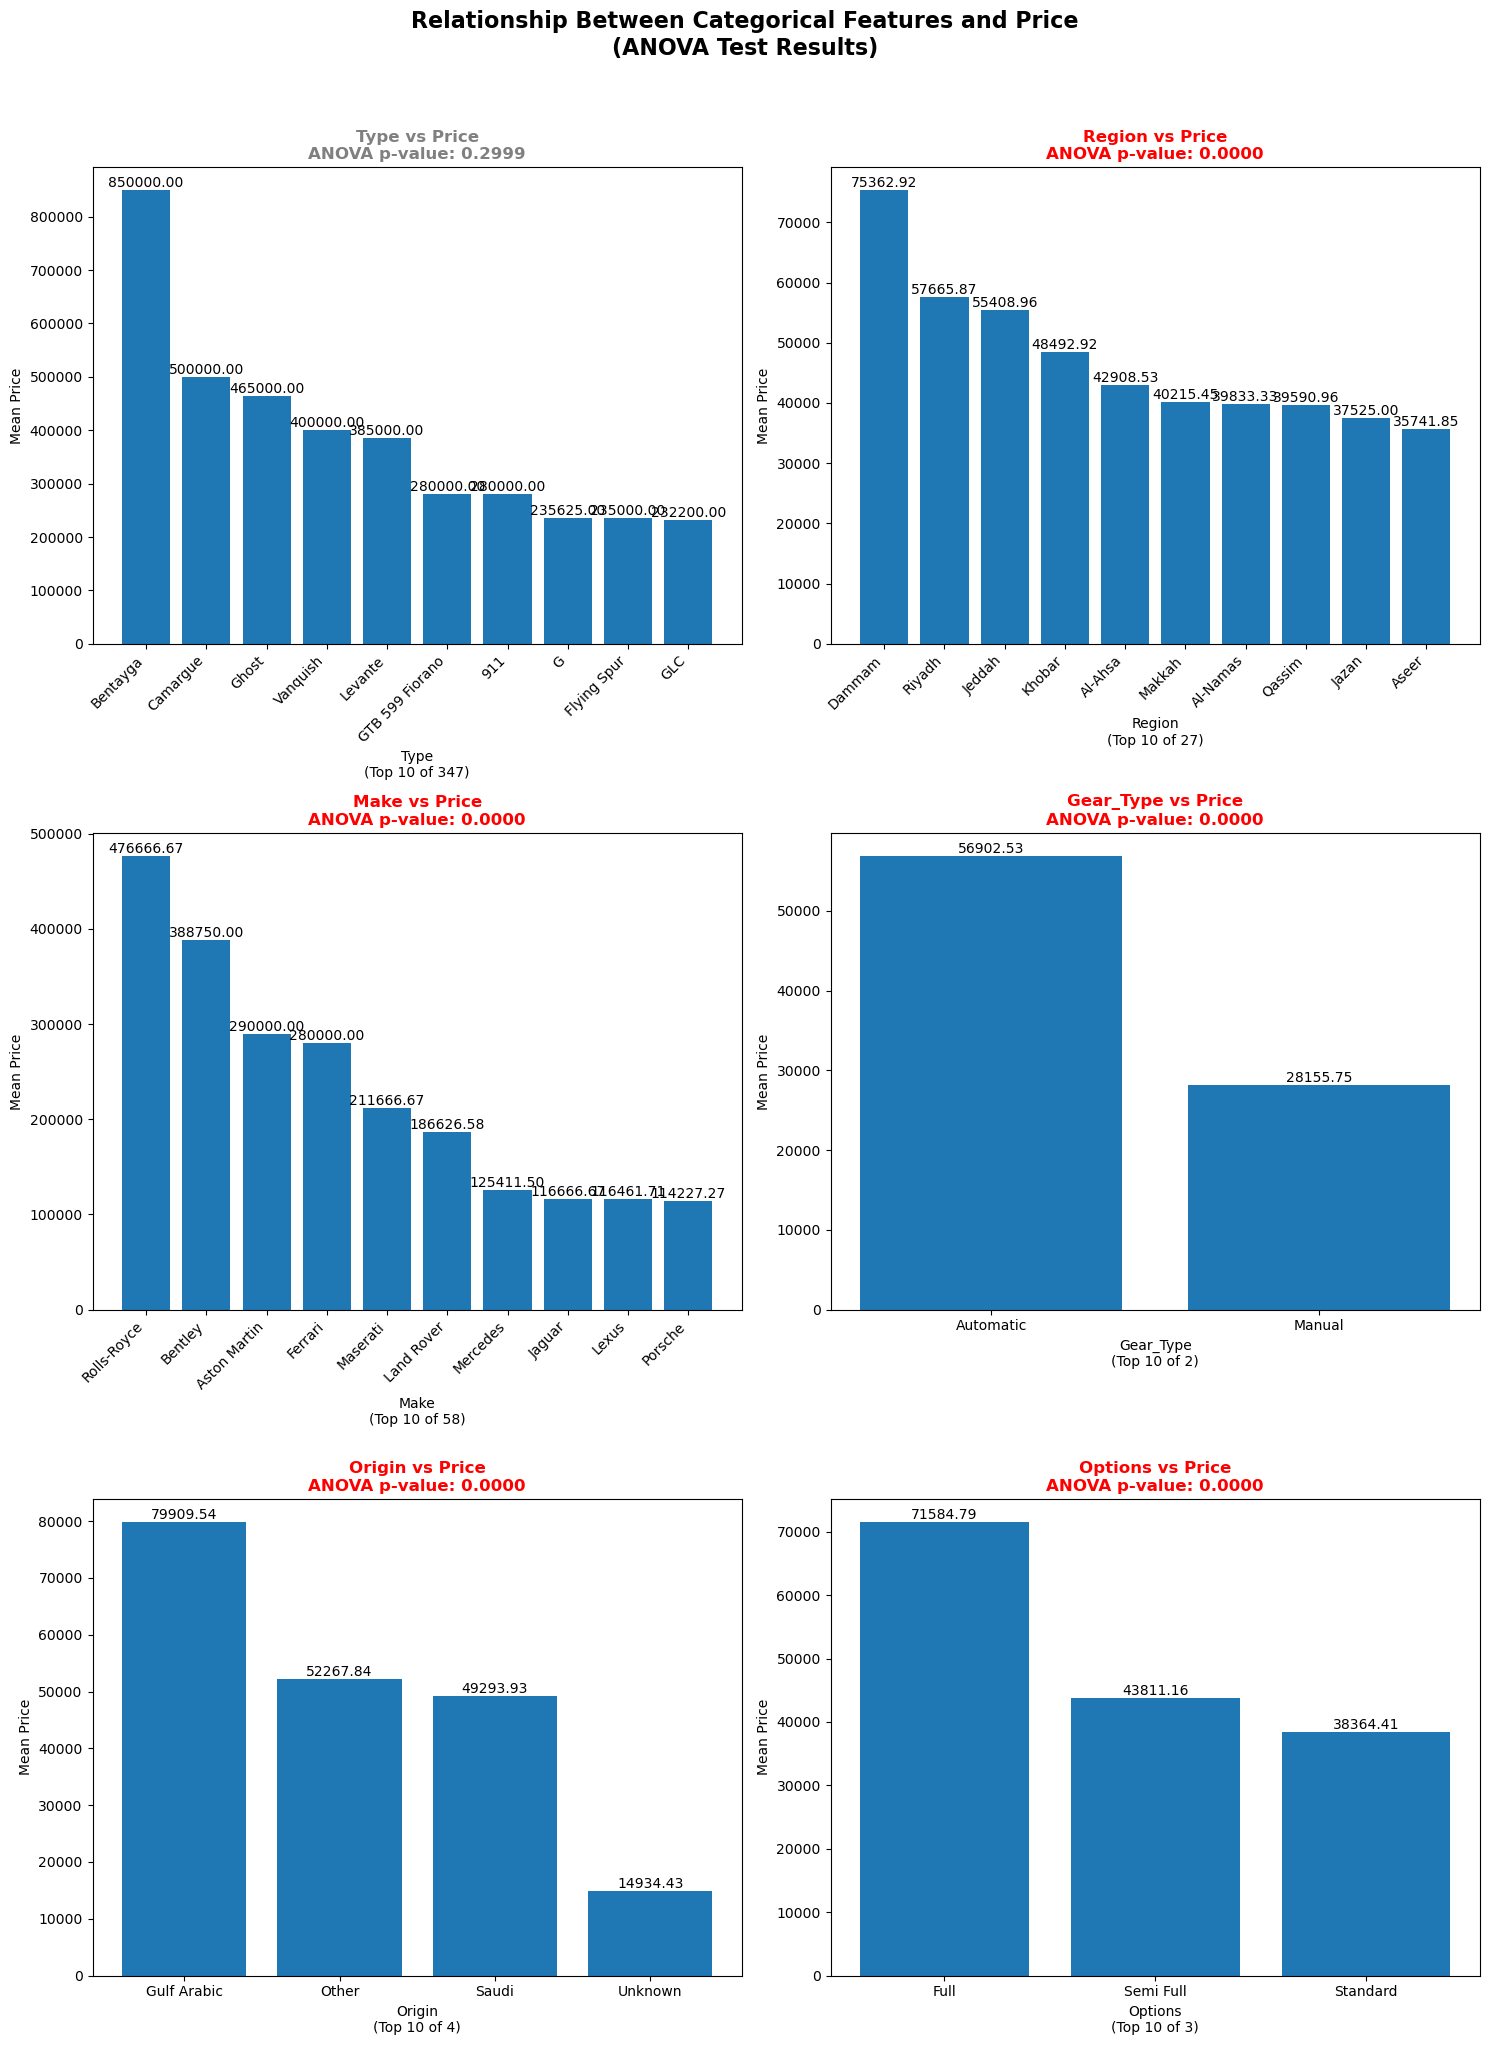


SUMMARY: ANOVA ANALYSIS FOR Price

Significant features (p < 0.05):
['Region', 'Make', 'Gear_Type', 'Origin', 'Options']


In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import kruskal, f_oneway
import numpy as np
import math

def detect_difference_by_category(df, target_col='Price', drop_cols=[], 
                                normality='not_normal', significance_level=0.05, 
                                figsize=(15, 20), max_categories=10):
    """
    Analyze relationships between categorical columns and a numeric target column.
    Uses bar plots showing mean/median values, limiting to top categories when variance is high.
    
    Parameters:
    - df: DataFrame to analyze
    - target_col: Numeric target column
    - drop_cols: Columns to exclude
    - normality: 'normal' for ANOVA (means), 'not_normal' for Kruskal-Wallis (medians)
    - significance_level: Statistical threshold (default 0.05)
    - figsize: Plot dimensions
    - max_categories: Maximum categories to show when variance is high
    """
    
    # Initialize results storage
    results = {
        'significant_features': [],
        'all_tests': {},
        'test_type': 'ANOVA' if normality == 'normal' else 'Kruskal-Wallis'
    }
    
    # Select categorical columns
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    categorical_cols = [col for col in categorical_cols 
                       if col not in drop_cols and col != target_col 
                       and df[col].nunique() > 1]
    
    # Calculate grid size
    n_cols = 2
    n_rows = math.ceil(len(categorical_cols) / n_cols)
    
    # Create figure
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    axes = axes.flatten()
    
    for idx, col in enumerate(categorical_cols):
        ax = axes[idx]
        
        # Calculate group statistics
        if normality == 'normal':
            group_stats = df.groupby(col)[target_col].mean()
        else:
            group_stats = df.groupby(col)[target_col].median()
        
        group_counts = df[col].value_counts()
        group_variance = df.groupby(col)[target_col].var()
        
        # Limit categories if too many or high variance
        if len(group_stats) > max_categories or group_variance.std() > group_stats.std():
            # Sort by target metric and take top N
            group_stats = group_stats.sort_values(ascending=False).head(max_categories)
            col_label = f"{col}\n(Top {max_categories} of {len(group_counts)})"
        else:
            col_label = col
        
        # Prepare groups for testing
        groups = []
        group_labels = []
        for value in group_stats.index:
            group_data = df[df[col] == value][target_col].dropna()
            if len(group_data) > 0:
                groups.append(group_data)
                group_labels.append(str(value))
        
        # Skip if not enough groups
        if len(groups) < 2:
            ax.axis('off')
            continue
            
        # Perform statistical test
        if normality == 'normal':
            stat, p_value = f_oneway(*groups)
            test_name = "ANOVA"
            metric = "Mean"
            h0 = f"Equal means across {col} groups"
            h1 = f"Different means across {col} groups"
        else:
            stat, p_value = kruskal(*groups)
            test_name = "Kruskal-Wallis"
            metric = "Median"
            h0 = f"Equal medians across {col} groups"
            h1 = f"Different medians across {col} groups"
        
        # Determine significance
        is_significant = p_value < significance_level
        sig_color = 'red' if is_significant else 'gray'
        
        # Create bar plot
        bars = ax.bar(group_labels, group_stats)
        ax.set_xlabel(col_label)
        ax.set_ylabel(f"{metric} {target_col}")
        
        # Add value labels
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.2f}',
                    ha='center', va='bottom')
        
        # Add title with test results
        title = f"{col} vs {target_col}\n"
        title += f"{test_name} p-value: {p_value:.4f}"
        ax.set_title(title, color=sig_color, fontweight='bold')
        
        # Rotate x-labels if needed
        if len(group_labels) > 5:
            plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
        
        # Store results
        test_result = {
            'p_value': p_value,
            'is_significant': is_significant,
            'statistic': stat,
            'null_hypothesis': h0,
            'alternative_hypothesis': h1,
            f'group_{metric.lower()}s': group_stats.to_dict(),
            'group_counts': group_counts.to_dict()
        }
        results['all_tests'][col] = test_result
        
        if is_significant:
            results['significant_features'].append(col)
    
    # Hide unused axes and format
    fig.suptitle(f'Relationship Between Categorical Features and {target_col}\n'
                f'({test_name} Test Results)', 
                fontsize=16, fontweight='bold', y=1.02)
    
    for idx in range(len(categorical_cols), len(axes)):
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # Print summary
    print("\n" + "="*60)
    print(f"SUMMARY: {test_name} ANALYSIS FOR {target_col}")
    print("="*60)
    print(f"\nSignificant features (p < {significance_level}):")
    print(results['significant_features'])
    
    return results

# Example usage
results = detect_difference_by_category(
    df_reg,
    target_col='Price',
    normality='normal',  # Change to 'normal' for ANOVA
    max_categories=10
)

In [31]:
results['significant_features']

['Region', 'Make', 'Gear_Type', 'Origin', 'Options']

<div style="text-align: center;">
  <h1 id='4.-Machine-Learning' style="background-color:rgb(109, 62, 122); color: white; padding: 10px 20px; margin-bottom: 20px; border-radius: 10px; font-weight: bold;">4. Machine Learning</h1>
</div>
<a id="machine-learning"></a>

<div style="text-align: center;">
  <h1 id='A.-Clasification' style="background-color:rgb(109, 62, 122); color: white; padding: 10px 20px; margin-bottom: 20px; border-radius: 10px; font-weight: bold;">A. Clasification</h1>
</div>
<a id="clasification"></a>

<a href="#A.-Clasification">Jump to : Clasification</a></li>

<a href="#B.-Regression">Jump to : Regression</a></li>

<div style="text-align: left;">
  <h2 id="define-X-and-y" style="background-color:rgb(56, 0, 69); color: white; padding: 10px 20px; margin-bottom: 20px; border-radius: 8px; font-weight: bold; display: inline-block; font-size: 30px">Define X and y</h2>
</div>

X is all feature we will be using to predict

y is the target of prediction

<div style="display: flex; justify-content: center; margin: 20px 0;">
  <div style="border: 2px solid; border-radius: 8px; padding: 10px 15px; width: fit-content; max-width: 90%;">
    <code><strong>Function to use:</strong> define_X_y(df, target=target_overal, drop_cols=[])</code>
  </div>
</div>


In [74]:
df_class = pd.read_csv('dataset/df_clean.csv',sep=',')

# Fill this first, it will be used for many function to cleaning and splitting
target_overal = 'Attrition'

In [75]:
def define_X_y(df, target=target_overal, drop_cols=[]):
    X = df.drop(columns=drop_cols + [target])
    y = df[target]
    print(f'X Column : {list(X.columns)}')
    print(f'y Column : {list(y)}')
    return X, y

X, y = define_X_y(df_class, target=target_overal, drop_cols=['EmpID'])

X Column : ['Age', 'AgeGroup', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'SalarySlab', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'SalaryGap', 'DailyRateGap']
y Column : [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 

<div style="text-align: left;">
  <h2 id="data-balance" style="background-color:rgb(56, 0, 69); color: white; padding: 10px 20px; margin-bottom: 20px; border-radius: 8px; font-weight: bold; display: inline-block; font-size: 30px">Data Balance</h2>
</div>

Percentage of data belonging to minority class	| Degree of imbalance
| --- | --- |
20-40% of the dataset	| Mild
1-20% of the dataset	| Moderate
<1% of the dataset	 | Extreme

<div style="display: flex; justify-content: center; margin: 20px 0;">
  <div style="border: 2px solid; border-radius: 8px; padding: 10px 15px; width: fit-content; max-width: 90%;">
    <code><strong>Function to use:</strong> check_class_balance(df, target=target_overal)/code>
  </div>
</div>

In [76]:
def check_class_balance(df, target=target_overal):
    """
    Check class imbalance and categorize its severity.

    Parameters:
    - df: DataFrame
    - target: Target column to evaluate (default 'Attrition')

    Returns:
    - Dictionary with details about class balance
    """

    class_1 = (df[target].astype('bool') == True).sum()
    class_0 = (df[target].astype('bool') == False).sum()

    if class_1 == class_0:
        print('✅ The data is perfectly balanced.')
        severity = 'Balanced'
    else:
        # Identify minority class and percentage
        minority_class_count = min(class_1, class_0)
        percentage = round(minority_class_count / df.shape[0] * 100, 2)

        print(f"⚠️ Data is Imbalanced.")
        print(f"Class 0 (False): {class_0}")
        print(f"Class 1 (True): {class_1}")
        print(f"Minority Class Percentage: {percentage}%")

        # Determine severity
        if 20 < percentage < 40:
            severity = 'Mild'
        elif 1 < percentage <= 20:
            severity = 'Moderate'
        elif percentage <= 1:
            severity = 'Extreme'
        else:
            severity = 'Balanced'  # This will catch cases where percentage > 40

        print(f"Severity of imbalance: {severity}")

check_class_balance(df_class, target=target_overal) # change the df_class

⚠️ Data is Imbalanced.
Class 0 (False): 1236
Class 1 (True): 237
Minority Class Percentage: 16.09%
Severity of imbalance: Moderate


<div style="text-align: left;">
  <h2 id="data-splitting" style="background-color:rgb(56, 0, 69); color: white; padding: 10px 20px; margin-bottom: 20px; border-radius: 8px; font-weight: bold; display: inline-block; font-size: 30px">Data Splitting</h2>
</div>

In [77]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
                                                    X,y,
                                                    test_size=0.2,
                                                    random_state=0,
                                                    stratify=y # make sure the distribution in y the same
)

print('Data Splitting Preview')
preview_data = pd.DataFrame({
    'Category' : ['X_train', 'y_train', 'X_test', 'y_test'],
    'Row' : [X_train.shape[0],  y_train.shape[0], X_test.shape[0], y_test.shape[0]],
    'Column' : [int(X_train.shape[1]), 0, int(X_test.shape[1]), 0]
})
preview_data

Data Splitting Preview


Category   Row  Column
0  X_train  1178      32
1  y_train  1178       0
2   X_test   295      32
3   y_test   295       0

<div style="text-align: left;">
  <h2 id="preprocessing" style="background-color:rgb(56, 0, 69); color: white; padding: 10px 20px; margin-bottom: 20px; border-radius: 8px; font-weight: bold; display: inline-block; font-size: 30px">Preprocessing</h2>
</div>

Separate the column into category, which one will use encoding or scaling

| **Category** | **Method**             | **Description**                                                              |
|--------------|------------------------|------------------------------------------------------------------------------|
| **Encoding** | OneHotEncoder          | Nominal categorical features (no order)                                     |
|              | OrdinalEncoder         | Ordinal categorical features (with order)                                   |
|              | BinaryEncoder           | Encodes categories into binary digits (useful for high cardinality features)|
| **Scaling**  | StandardScaler         | Normally distributed numeric features                                       |
|              | MinMaxScaler           | Scales values between 0–1                                                   |
|              | RobustScaler           | Handles outliers by using median/IQR                                        |

In [78]:
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline  # For imbalanced datasets

from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder, MinMaxScaler
from category_encoders import OrdinalEncoder, BinaryEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Fill column name here

One_Hot = ['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','SalarySlab','OverTime']

Ordinal = ['AgeGroup']

Robust = ['Age','DailyRateGap','DistanceFromHome','Education','EnvironmentSatisfaction','HourlyRate',
          'JobInvolvement','JobLevel','JobSatisfaction','SalaryGap','MonthlyRate','NumCompaniesWorked',
          'PercentSalaryHike','PerformanceRating','RelationshipSatisfaction','StockOptionLevel','TotalWorkingYears',
          'TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']


ordinal_encoding = [
    {  # Ranking: higher values indicate higher churn risk
        'col': 'AgeGroup',
        'mapping': {
            '55+': 1,
            '46-55': 2,
            '36-45': 3,
            '26-35': 4,
            '18-25' : 5
        }
    },
    #     {  # Ranking: higher values indicate higher churn risk
    #     'col': 'cluster',
    #     'mapping': {
    #         'Low Risk': 1,
    #         'Medium Risk': 2,
    #         'High Risk' : 3
    #     }
    # }
]

pipe_ordinal_robust = Pipeline([
    ('ordinal',OrdinalEncoder(mapping=ordinal_encoding)),
    ('robust',RobustScaler())
])

# for filling NaN
# numeric_pipeline = Pipeline([
#     ('imputer', SimpleImputer(strategy='median')),
#     ('scaler', StandardScaler())
# ])

# categorical_pipeline = Pipeline([
#     ('imputer', SimpleImputer(strategy='most_frequent')),
#     ('encoder', OneHotEncoder(handle_unknown='ignore'))
# ])


transformer = ColumnTransformer([
    ('pipe_ordinal_robust', pipe_ordinal_robust, Ordinal),
    ('robust', RobustScaler(), Robust),
    ('onehot', OneHotEncoder(drop='first',handle_unknown='ignore'), One_Hot)
], remainder='passthrough')


In [79]:
transformed_array = transformer.fit_transform(X_train)
transformed_array

array([[-1.        ,  0.92307692, -0.04153005, ...,  0.        ,
         1.        ,  1.        ],
       [ 1.        , -0.07692308,  0.20910747, ...,  0.        ,
         0.        ,  0.        ],
       [-1.        ,  1.07692308, -0.05027322, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.        , -0.23076923, -0.54499089, ...,  1.        ,
         0.        ,  0.        ],
       [-1.        ,  0.84615385,  0.34972678, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.        , -0.15384615,  0.60327869, ...,  0.        ,
         1.        ,  0.        ]])

In [80]:
preview_data['Final Features'] = [len(transformed_array[0]),1,len(transformed_array[0]),1]
preview_data

Category   Row  Column  Final Features
0  X_train  1178      32              48
1  y_train  1178       0               1
2   X_test   295      32              48
3   y_test   295       0               1

<div style="text-align: left;">
  <h2 id="cross-validation" style="background-color:rgb(56, 0, 69); color: white; padding: 10px 20px; margin-bottom: 20px; border-radius: 8px; font-weight: bold; display: inline-block; font-size: 30px">Cross Validation</h2>
</div>

Cross-validation tests a model on different data splits to check its generalization. It helps avoid overfitting.

For clasification we find the score nearest to 1

<div style="display: flex; justify-content: center; margin: 20px 0;">
  <div style="border: 2px solid; border-radius: 8px; padding: 10px 15px; width: fit-content; max-width: 90%;">
    <code><strong>Function to use:</strong> get_scorers(metrics=[''])/code>
  </div>
</div>

In [81]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, fbeta_score,
    roc_auc_score, make_scorer
)

def get_scorers(metrics=None, multiclass_auc='ovr'):
    all_scorers = {
        # Basic Metrics
        "accuracy": make_scorer(accuracy_score),
        "precision": make_scorer(precision_score),
        "recall": make_scorer(recall_score),
        "f1": make_scorer(f1_score),
        
        # F-beta Variants
        "f2": make_scorer(fbeta_score, beta=2),
        "f1.5": make_scorer(fbeta_score, beta=1.5),
        "f0.5": make_scorer(fbeta_score, beta=0.5),
        
        # ROC-AUC (requires predict_proba)
        "roc_auc": make_scorer(roc_auc_score, multi_class=multiclass_auc, needs_proba=True),
    }
    
    if metrics is None:
        return all_scorers
    else:
        return {name: all_scorers[name] for name in metrics if name in all_scorers}

# Choose what scorer you will use ['accuracy','precision','recall','f1','f2','f1.5','f0.5','roc_auc']
scorers = get_scorers(metrics=['accuracy','f1','f2']) # fill here
scorers


{'accuracy': make_scorer(accuracy_score, response_method='predict'),
 'f1': make_scorer(f1_score, response_method='predict'),
 'f2': make_scorer(fbeta_score, response_method='predict', beta=2)}

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier,
    VotingClassifier, StackingClassifier, BaggingClassifier
)
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate

# Define classifiers
log_reg = LogisticRegression(random_state=42)
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
gradient_boosting = GradientBoostingClassifier(random_state=42)
xgboost = XGBClassifier(random_state=42)
lightgbm = LGBMClassifier(random_state=42,verbose=-1)
catboost = CatBoostClassifier(random_state=42, verbose=0)
knn = KNeighborsClassifier()


# Define models (including Voting Classifier)
models = {
    "Logistic_Regression": log_reg,
    "Decision_Tree": decision_tree,
    "Random_Forest": random_forest,
    "Gradient_Boosting": gradient_boosting,
    "XGBoost": xgboost,
    "LightGBM": lightgbm,
    "CatBoost": catboost,
    "KNN": knn,
    "Voting_Classifier": VotingClassifier(estimators=[
        # ('clf1', log_reg),
        ('clf2', random_forest),
        ('clf3', lightgbm),
        ('clf4', catboost),
        ('clf5', xgboost)
    ])
}

results = []
for model_name, model in models.items():
    # Check if 'roc_auc' is in the scorers
    if 'roc_auc' in scorers:
        # Ensure the model has predict_proba, which is required for roc_auc
        if not hasattr(model, "predict_proba"):
            print(f"Skipping ROC AUC for {model_name} because it doesn't support predict_proba.")
            scorers.pop('roc_auc', None)  # Remove roc_auc from the scoring if not supported

    # Build the pipeline
    pipe = Pipeline([
        ('preprocessing', transformer),
        ('model', model)
    ])
    
    # Run cross-validation with multiple scorers
    cv_results = cross_validate(pipe, X_train, y_train, cv=5, scoring=scorers)
    
    # Start building the result dictionary with model name
    result_dict = {"Model": model_name}
    
    # Loop through each scorer to get mean and std values
    for scorer in scorers:
        result_dict[f"{scorer.capitalize()} Mean"] = cv_results[f"test_{scorer}"].mean()
        result_dict[f"{scorer.capitalize()} Std"] = cv_results[f"test_{scorer}"].std()
    
    # Append the result dictionary to the results list
    results.append(result_dict)

# Convert to DataFrame, change the order by scorer you choose
df_results = pd.DataFrame(results).sort_values(by="F2 Mean", ascending=False)

# Print results
df_results


Model  Accuracy Mean  Accuracy Std   F1 Mean    F1 Std  \
0  Logistic_Regression       0.868428      0.006969  0.495166  0.015220   
4              XGBoost       0.855680      0.021514  0.418696  0.099828   
1        Decision_Tree       0.768179      0.039037  0.334249  0.079565   
3    Gradient_Boosting       0.861626      0.006949  0.415171  0.012624   
5             LightGBM       0.865878      0.011536  0.407177  0.069886   
6             CatBoost       0.862477      0.007416  0.330522  0.021089   
8    Voting_Classifier       0.857393      0.012082  0.286927  0.065861   
2        Random_Forest       0.847187      0.008689  0.172259  0.061182   
7                  KNN       0.843805      0.010508  0.163508  0.054348   

    F2 Mean    F2 Std  
0  0.433142  0.016853  
4  0.357479  0.089303  
1  0.347484  0.081573  
3  0.341114  0.023293  
5  0.327046  0.067335  
6  0.246195  0.017871  
8  0.210565  0.051677  
2  0.120112  0.045403  
7  0.113888  0.037930

<div style="text-align: left;">
  <h2 id="select-best-model" style="background-color:rgb(56, 0, 69); color: white; padding: 10px 20px; margin-bottom: 20px; border-radius: 8px; font-weight: bold; display: inline-block; font-size: 30px">Select Best Model</h2>
</div>

Select which model you want to choose for further Hyperparameter

In [83]:
# Select model and scorer
SELECTED_MODEL = 'CatBoost'
# Model Available : Logistic_Regression, "Decision_Tree", "Random_Forest", "Gradient_Boosting", "XGBoost", "LightGBM", "CatBoost", "KNN", "Voting_Classifier"

SELECTED_SCORER = 'f1'  # Change this to any key from scorers dictionary (choose only 1 to focus)
# Scorer Available = "accuracy","precision","recall","f1","f2","f1.5","f0.5","roc_auc"

<div style="text-align: left;">
  <h2 id="confusion-matrix-before" style="background-color:rgb(56, 0, 69); color: white; padding: 10px 20px; margin-bottom: 20px; border-radius: 8px; font-weight: bold; display: inline-block; font-size: 30px">Confusion Matrix Before Tuning</h2>
</div>


======================== EVALUATION RESULTS =========================
│ Model:          CATBOOST                                          │
│ Stage:          Before Tuning                                     │
│ Metric:         f1_score                                          │
│ CV Scores:      [0.3111 0.3137 0.3404 0.32   0.3673]              │
│ CV Mean:        0.3305 ± 0.0211                                   │
---------------------------------------------------------------------
│ Train Score:    0.9532                                            │
│ Test Score:     0.3729                                            │

Confusion Matrix (Test Set):


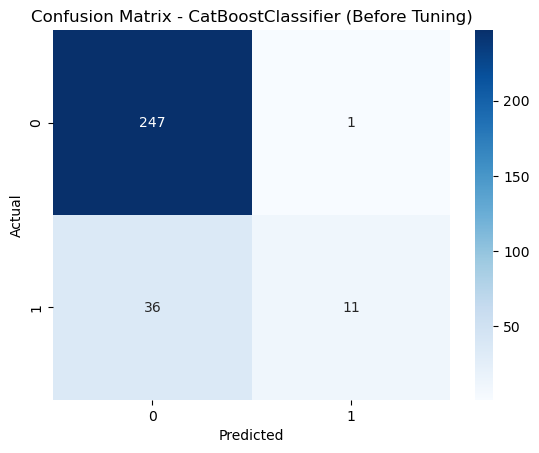

In [84]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import (
    fbeta_score, confusion_matrix, precision_score, recall_score, f1_score
)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def evaluate_model(pipe, X_train, y_train, X_test, y_test, scorer, status):
    """
    Evaluate a classification pipeline using cross-validation and F-beta score.
    Optionally display precision, recall, and F1-score.

    Parameters:
    - pipe: scikit-learn Pipeline
    - X_train, y_train: Training data
    - X_test, y_test: Test data (only used for final evaluation)
    - scorer: scoring function (e.g., from make_scorer)
    - status: string indicating evaluation context ('Before' or 'After')
    """
    metric_name = scorer._score_func.__name__
    beta = scorer._kwargs.get('beta')  # Get beta from scorer if exists
    
    # Cross-validation (safe - only uses training data)
    cv_scores = cross_val_score(
        pipe, 
        X_train, 
        y_train, 
        cv=5, 
        scoring=scorer,
        groups=X_train.index if hasattr(X_train, 'index') else None
    )

    # Fit and predict (proper train-test separation)
    pipe.fit(X_train, y_train)
    y_pred_test = pipe.predict(X_test)
    y_pred_train = pipe.predict(X_train)  # For training metric calculation

    # Calculate metrics    
    if metric_name == 'fbeta_score':
        train_metric = fbeta_score(y_train, y_pred_train, beta=beta)
        test_metric = fbeta_score(y_test, y_pred_test, beta=beta)
    elif metric_name == 'precision_score':
        train_metric = precision_score(y_train, y_pred_train)
        test_metric = precision_score(y_test, y_pred_test)
    elif metric_name == 'recall_score':
        train_metric = recall_score(y_train, y_pred_train)
        test_metric = recall_score(y_test, y_pred_test)
    elif metric_name == 'f1_score':
        train_metric = f1_score(y_train, y_pred_train)
        test_metric = f1_score(y_test, y_pred_test)
    elif metric_name == 'accuracy_score':
        train_metric = accuracy_score(y_train, y_pred_train)
        test_metric = accuracy_score(y_test, y_pred_test)
    elif metric_name == 'roc_auc_score':
        # Use predicted probabilities for ROC AUC
        y_pred_proba_train = model.predict_proba(X_train)[:, 1]
        y_pred_proba_test = model.predict_proba(X_test)[:, 1]
        train_metric = roc_auc_score(y_train, y_pred_proba_train)
        test_metric = roc_auc_score(y_test, y_pred_proba_test)
    else:
        raise ValueError(f"Unsupported metric: {metric_name}")

    print(f"\n{' EVALUATION RESULTS ':=^69}")
    print(f"│ {'Model:':<15} {SELECTED_MODEL.upper():<50}│")
    print(f"│ {'Stage:':<15} {status:<50}│")
    beta_display = f"β={beta}" if beta is not None else ""

    print(f"│ {'Metric:':<15} {metric_name + ' ' + beta_display:<50}│")
    print(f"│ {'CV Scores:':<15} {str(np.round(cv_scores, 4)):<50}│")
    print(f"│ {'CV Mean:':<15} {str(round(np.mean(cv_scores),4))+ ' ± ' +str(round(np.std(cv_scores),4)):<50}│")
    print(f"{'':-^69}")
    print(f"│ {'Train Score:':<15} {str(round(train_metric,4)):<50}│")
    print(f"│ {'Test Score:':<15} {str(round(test_metric,4)):<50}│")
    print(f"{'':=^69}")

    # Confusion Matrix (test set only)
    print("\nConfusion Matrix (Test Set):")
    cm = confusion_matrix(y_test, y_pred_test)
    sns.heatmap(cm, annot=True, fmt='g', cmap="Blues")
    plt.title(f"Confusion Matrix - {type(pipe.steps[-1][1]).__name__} ({status})")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    return [cm,test_metric]

# Before tuning
pipe_basic = Pipeline([
    ('preprocessing', transformer),
    ('model', models[SELECTED_MODEL])
])

base_cm = evaluate_model(pipe_basic, X_train, y_train, X_test, y_test, 
               scorer=scorers[SELECTED_SCORER], status='Before Tuning')

<div style="text-align: left;">
  <h2 id="hyperparameter-tuning" style="background-color:rgb(56, 0, 69); color: white; padding: 10px 20px; margin-bottom: 20px; border-radius: 8px; font-weight: bold; display: inline-block; font-size: 30px">Hyperparameter Tuning</h2>
</div>

Paramater for each model already provided, you can edit param the model you choose on param_distributions variable

In [85]:
from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss

resampling_methods = {
    "none": None,
    "undersampling": RandomUnderSampler(random_state=42),
    "oversampling": RandomOverSampler(random_state=42),
    "smote": SMOTE(random_state=42, sampling_strategy='minority'),
    "nearmiss": NearMiss(sampling_strategy='majority')
}

# Define parameter distributions for each model type
param_distributions = {
    'Logistic_Regression': {
        'resampler': list(resampling_methods.values()),  # Resampling method (e.g. SMOTE, undersampling)
        'model__C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse regularization strength
        'model__penalty': ['l1', 'l2'],  # Type of regularization
        'model__solver': ['liblinear', 'saga'],  # Optimization algorithm
        'model__max_iter': [100, 500, 1000]  # Max iterations for convergence
    },
    'Decision_Tree': {
        'resampler': list(resampling_methods.values()),
        'model__max_depth': [3, 5, 10, 15, 20, None],  # Maximum depth of the tree
        'model__min_samples_split': [2, 5, 10, 20],  # Min samples to split a node
        'model__min_samples_leaf': [1, 2, 5, 10],  # Min samples required in a leaf
        'model__criterion': ['gini', 'entropy']  # Split quality function
    },
    'Random_Forest': {
        'resampler': list(resampling_methods.values()),
        'model__n_estimators': [50, 100, 200, 500],  # Number of trees in the forest
        'model__max_depth': [3, 5, 10, 20, None],  # Max depth of each tree
        'model__min_samples_split': [2, 5, 10, 20],  # Min samples to split a node
        'model__min_samples_leaf': [1, 2, 5, 10],  # Min samples in a leaf node
        'model__max_features': [0.1, 0.3, 0.5, 0.7, 0.9, 'sqrt', 'log2']  # Features to consider at split
    },
    'Gradient_Boosting': {
        'resampler': list(resampling_methods.values()),
        'model__n_estimators': [50, 100, 200, 500],  # Number of boosting stages
        'model__learning_rate': [0.001, 0.01, 0.1, 0.3],  # Step size shrinkage
        'model__max_depth': [3, 5, 7, 10],  # Max depth of individual trees
        'model__min_samples_split': [2, 5, 10, 20],  # Min samples to split node
        'model__min_samples_leaf': [1, 2, 5, 10],  # Min samples in leaf node
        'model__subsample': [0.5, 0.7, 0.9, 1.0]  # Fraction of samples used per tree
    },
    'XGBoost': {
        'resampler': list(resampling_methods.values()),
        'model__n_estimators': [50, 100, 200, 500],  # Number of boosting rounds
        'model__max_depth': [3, 5, 7, 10],  # Max depth of trees
        'model__learning_rate': [0.001, 0.01, 0.1, 0.3],  # Step size shrinkage
        'model__subsample': [0.5, 0.7, 0.9, 1.0],  # Fraction of samples per boosting round
        'model__colsample_bytree': [0.5, 0.7, 0.9, 1.0]  # Fraction of features per tree
    },
    'LightGBM': {
        'resampler': list(resampling_methods.values()),
        'model__n_estimators': [50, 100, 200, 500],  # Number of boosting rounds
        'model__max_depth': [3, 5, 7, 10, 12],  # Max depth of trees
        'model__learning_rate': [0.001, 0.01, 0.1, 0.3],  # Learning rate
        'model__num_leaves': [20, 31, 50, 100],  # Max number of leaves per tree
        'model__min_child_samples': [5, 10, 20, 30]  # Min samples per leaf
    },
    'CatBoost': {
        'resampler': list(resampling_methods.values()),
        'model__iterations': [50, 100, 200, 500],  # Number of boosting iterations
        'model__depth': [3, 5, 7, 10],  # Depth of the tree
        'model__learning_rate': [0.001, 0.01, 0.1, 0.3],  # Step size
        'model__l2_leaf_reg': [0.001, 0.01, 0.1, 1, 10]  # L2 regularization term
    },
    'KNN': {
        'resampler': list(resampling_methods.values()),
        'model__n_neighbors': [3, 5, 10, 15, 20, 25, 30],  # Number of neighbors to use
        'model__weights': ['uniform', 'distance'],  # Weight function for prediction
        'model__p': [1, 2, 3]  # Power parameter for distance metric
    }

}

# Create pipeline
pipe = Pipeline([
    ('preprocessing', transformer),
    ('resampler', None),  # Will be set by RandomizedSearchCV
    ('model', models[SELECTED_MODEL])
])

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=pipe,
    param_distributions=param_distributions[SELECTED_MODEL],
    n_iter=20,
    scoring=scorers[SELECTED_SCORER],
    cv=5,
    n_jobs=-1,
    random_state=42,
    verbose=0
)


grid_search = GridSearchCV(
    estimator = pipe,
    cv = 5,
    scoring = scorers[SELECTED_SCORER],
    refit=True,  # Uses the same metric as scoring
    n_jobs= -1,
    param_grid= param_distributions[SELECTED_MODEL]   
)

# Fit the model
selected_search = random_search # choose here between random_search or grid_search
selected_search.fit(X_train, y_train)

# Best parameters and model
best_model = selected_search.best_estimator_
print("Best score:", selected_search.best_score_)
print("Best parameters:")
df_hyper = pd.DataFrame({'Parameter' : selected_search.best_params_.keys(),'Setting' :selected_search.best_params_.values()})
df_hyper

Best score: 0.5262628815098511
Best parameters:


Parameter                             Setting
0             resampler  RandomOverSampler(random_state=42)
1  model__learning_rate                                0.01
2    model__l2_leaf_reg                                   1
3     model__iterations                                 500
4          model__depth                                   3

In [86]:
result_test = pd.DataFrame(selected_search.cv_results_).sort_values(by='rank_test_score',ascending=True).drop(columns=['mean_fit_time','std_fit_time','mean_score_time','std_score_time','params']).head(3)
front_cols = ['rank_test_score', 'mean_test_score', 'std_test_score']
result_test = result_test[front_cols + [col for col in result_test.columns if col not in front_cols]]
print(f'Model : {SELECTED_MODEL}, Main Scorer : {SELECTED_SCORER}')
result_test

Model : CatBoost, Main Scorer : f1


rank_test_score  mean_test_score  std_test_score  \
18                1         0.526263        0.036835   
11                2         0.491770        0.059806   
12                3         0.487542        0.075386   

                                         param_resampler  \
18                    RandomOverSampler(random_state=42)   
11  SMOTE(random_state=42, sampling_strategy='minority')   
12  SMOTE(random_state=42, sampling_strategy='minority')   

    param_model__learning_rate  param_model__l2_leaf_reg  \
18                       0.010                     1.000   
11                       0.001                     0.001   
12                       0.010                     1.000   

    param_model__iterations  param_model__depth  split0_test_score  \
18                      500                   3           0.559140   
11                      500                   7           0.492308   
12                      100                   7           0.461538   

    split1_test_score  split2_test_score  split3_test_score  split4_test_score  
18           0.500000           0.558140           0.466667           0.547368  
11           0.453333           0.580645           0.406250           0.526316  
12           0.447368           0.615385           0.393939           0.519481


======================== EVALUATION RESULTS =========================
│ Model:          CATBOOST                                          │
│ Stage:          After Tuning                                      │
│ Metric:         f1_score                                          │
│ CV Scores:      [0.5591 0.5    0.5581 0.4667 0.5474]              │
│ CV Mean:        0.5263 ± 0.0368                                   │
---------------------------------------------------------------------
│ Train Score:    0.6582                                            │
│ Test Score:     0.4956                                            │

Confusion Matrix (Test Set):


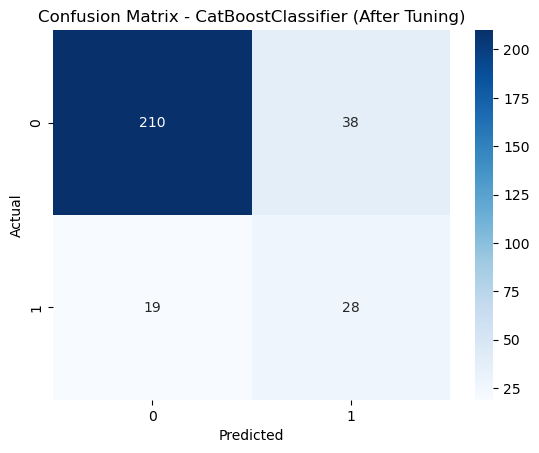

In [87]:
# After tuning
pipe_tune = best_model

tuned_cm = evaluate_model(pipe_tune, X_train, y_train, X_test, y_test, 
               scorer=scorers[SELECTED_SCORER], status='After Tuning')


Score Before : 0.3729, After : 0.4956, Improvement : 32.9 %


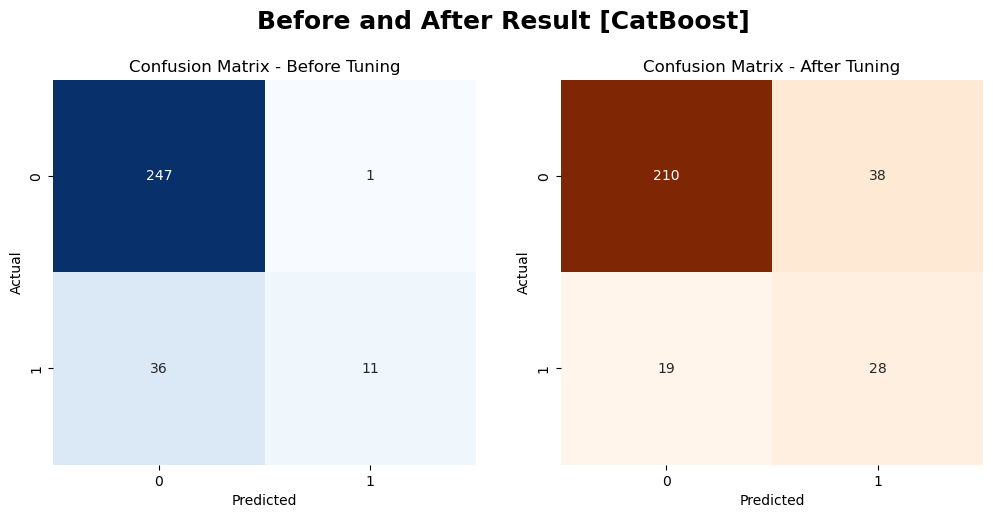

In [88]:
print(f'Score Before : {round(base_cm[1],4)}, After : {round(tuned_cm[1],4)}, Improvement : {round((tuned_cm[1]-base_cm[1])/base_cm[1]*100,2)} %')
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# Confusion Matrix Before Tuning
sns.heatmap(base_cm[0], annot=True, fmt='g', ax=axes[0], cmap='Blues', cbar=False)
axes[0].set_title("Confusion Matrix - Before Tuning")
axes[0].set_xlabel("Predicted")  # Fixed: using set_xlabel() method
axes[0].set_ylabel("Actual")     # Fixed: using set_ylabel() method

# Confusion Matrix After Tuning
sns.heatmap(tuned_cm[0], annot=True, fmt='g', ax=axes[1], cmap='Oranges', cbar=False)
axes[1].set_title("Confusion Matrix - After Tuning")
axes[1].set_xlabel("Predicted")  # Added xlabel for second plot
axes[1].set_ylabel("Actual")           # Clear ylabel for second plot to avoid duplication

fig.suptitle(f'Before and After Result [{SELECTED_MODEL}]', fontsize=18, fontweight='bold', y=1.02)
# plt.tight_layout()
plt.show()

<div style="text-align: left;">
  <h2 id="cost-evaluation" style="background-color:rgb(56, 0, 69); color: white; padding: 10px 20px; margin-bottom: 20px; border-radius: 8px; font-weight: bold; display: inline-block; font-size: 30px">Cost Evaluation</h2>
</div>

In [89]:
# Usually FN cost more expensive than FP, in FP we give compensation that not really happen. but in FN we dont do anything but lost the significant amount
FN_cost = 50000
FP_cost = 15000
currency = '$'


# Before tuning
TN, FP, FN, TP = base_cm[0].ravel()

# After tuning
TN_tuned, FP_tuned, FN_tuned, TP_tuned = tuned_cm[0].ravel()

def format_cost(value):
    return f"{value:,}".replace(",", ".")

print(f"""
    💰 Cost of Base Model     : {currency} {format_cost(FN * 40000 + FP * 15000)}
    💰 Cost of Tuned Model    : {currency} {format_cost(FN_tuned * 40000 + FP_tuned * 15000)}
    ✅ Cost Saved by Company  : {currency} {format_cost((FN * 40000 + FP * 15000) - (FN_tuned * 40000 + FP_tuned * 15000))}
""")


    💰 Cost of Base Model     : $ 1.455.000
    💰 Cost of Tuned Model    : $ 1.330.000
    ✅ Cost Saved by Company  : $ 125.000



<div style="text-align: left;">
  <h2 id="threshold-optimization" style="background-color:rgb(56, 0, 69); color: white; padding: 10px 20px; margin-bottom: 20px; border-radius: 8px; font-weight: bold; display: inline-block; font-size: 30px">Threshold Optimization</h2>
</div>

We can try to optimize threshold and see if we edit this can make the model better

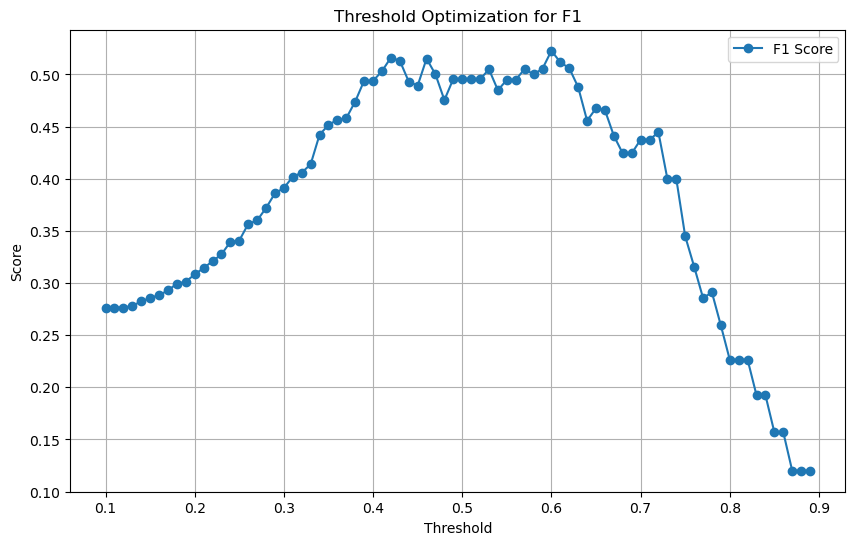


🔍 Best Threshold for F1: 0.60

📊 Confusion Matrix:
[[230  18]
 [ 24  23]]

📄 Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       248
           1       0.56      0.49      0.52        47

    accuracy                           0.86       295
   macro avg       0.73      0.71      0.72       295
weighted avg       0.85      0.86      0.85       295



In [90]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, fbeta_score,
    roc_auc_score, classification_report, confusion_matrix, precision_recall_curve
)

# Fit the model
best_model.fit(X_train, y_train)

# Get probabilities
y_prob = best_model.predict_proba(X_test)[:, 1]

# Threshold range
thresholds = np.arange(0.1, 0.9, 0.01)

# Collect scores
scores = []

for threshold in thresholds:
    y_pred = (y_prob > threshold).astype(int)

    if SELECTED_SCORER == 'precision':
        scores.append(precision_score(y_test, y_pred))
    elif SELECTED_SCORER == 'recall':
        scores.append(recall_score(y_test, y_pred))
    elif SELECTED_SCORER == 'accuracy':
        scores.append(accuracy_score(y_test, y_pred))
    elif SELECTED_SCORER == 'roc_auc':
        scores.append(roc_auc_score(y_test, y_prob))  # Note: not threshold-based
    elif SELECTED_SCORER.startswith('f'):
        beta = float(SELECTED_SCORER[1:]) if SELECTED_SCORER != 'f1' else 1.0
        scores.append(fbeta_score(y_test, y_pred, beta=beta))
    else:
        raise ValueError("Unsupported scorer. Choose from 'f1', 'f1.5', 'f2', 'precision', 'recall', 'accuracy', 'roc_auc'.")

# Plot (skip threshold-dependent plot for ROC AUC)
if SELECTED_SCORER != 'roc_auc':
    plt.figure(figsize=(10, 6))
    plt.plot(thresholds, scores, label=f'{SELECTED_SCORER.upper()} Score', marker='o')
    plt.xlabel('Threshold')
    plt.ylabel('Score')
    plt.title(f'Threshold Optimization for {SELECTED_SCORER.upper()}')
    plt.grid(True)
    plt.legend()
    plt.show()

    # Best threshold based on selected scorer
    best_threshold = thresholds[np.argmax(scores)]
else:
    # Use default threshold 0.5 for ROC AUC
    best_threshold = 0.5

print(f"\n🔍 Best Threshold for {SELECTED_SCORER.upper()}: {best_threshold:.2f}")

# Predict with best threshold
y_pred_adjusted = (y_prob > best_threshold).astype(int)

# Evaluation
print("\n📊 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_adjusted))
print("\n📄 Classification Report:")
print(classification_report(y_test, y_pred_adjusted))

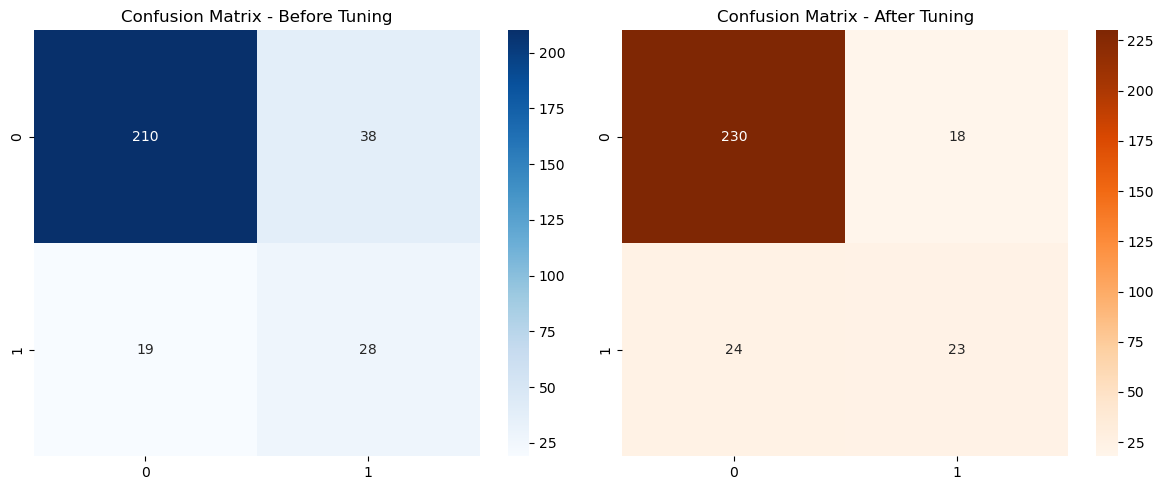

In [91]:
pipe_tune.fit(X_train, y_train)

y_pred_adjusted = (pipe_tune.predict_proba(X_test)[:, 1] > best_threshold ).astype(int)
y_pred_adjusted

fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# Confusion Matrix Before Tuning
sns.heatmap(tuned_cm[0], annot=True, fmt='g', ax=axes[0], cmap='Blues')
axes[0].set_title("Confusion Matrix - Before Tuning")

# Confusion Matrix After Tuning
sns.heatmap(confusion_matrix(y_test, y_pred_adjusted), annot=True, fmt='g', ax=axes[1], cmap='Oranges')
axes[1].set_title("Confusion Matrix - After Tuning")

plt.tight_layout()
plt.show()

In [92]:
# Usually FN cost more expensive than FP, in FP we give compensation that not really happen. but in FN we dont do anything but lost the significant amount
# Before tuning
TN_tuned, FP_tuned, FN_tuned, TP_tuned = tuned_cm[0].ravel()

# After tuning
TN_adjusted, FP_adjusted, FN_adjusted, TP_adjusted = confusion_matrix(y_test, y_pred_adjusted).ravel()

def format_cost(value):
    return f"{value:,}".replace(",", ".")

print(f"""
    💰 Cost of Base Model     : {currency} {format_cost(FN * 40000 + FP * 15000)}
    💰 Cost of Tuned Model    : {currency} {format_cost(FN_tuned * 40000 + FP_tuned * 15000)}
    💰 Cost of Adjusted Model : {currency} {format_cost(FN_adjusted * 40000 + FP_adjusted * 15000)}

    ✅ Cost Saved by Company  : {currency} {format_cost((FN * 40000 + FP * 15000) - (FN_adjusted * 40000 + FP_adjusted * 15000))}
""")



    💰 Cost of Base Model     : $ 1.455.000
    💰 Cost of Tuned Model    : $ 1.330.000
    💰 Cost of Adjusted Model : $ 1.230.000

    ✅ Cost Saved by Company  : $ 225.000



<div style="text-align: left;">
  <h2 id="model-evaluation" style="background-color:rgb(56, 0, 69); color: white; padding: 10px 20px; margin-bottom: 20px; border-radius: 8px; font-weight: bold; display: inline-block; font-size: 30px">Model Evaluation</h2>
</div>

| Method             | What It Does                                             | Pros                                     | Cons                                      |
|--------------------|----------------------------------------------------------|------------------------------------------|-------------------------------------------|
| Feature Importance | Shows which features most affect model predictions       | Simple, fast                              | Model-specific, no local explanation      |
| LIME               | Explains a single prediction with a local surrogate model| Model-agnostic, local explanation         | Slower, may be unstable across runs       |
| SHAP               | Assigns each feature a contribution value per prediction | Consistent, global & local explanations   | Computationally expensive for large data  |


<div style="text-align: middle;">
  <h3 id="feature-importance" style="background-color:rgb(32, 1, 39); color: white; padding: 10px 10px; margin-bottom: 10px; border-radius: 8px; font-weight: bold; display: inline-block; font-size: 20px">Feature Importance</h3>
</div>

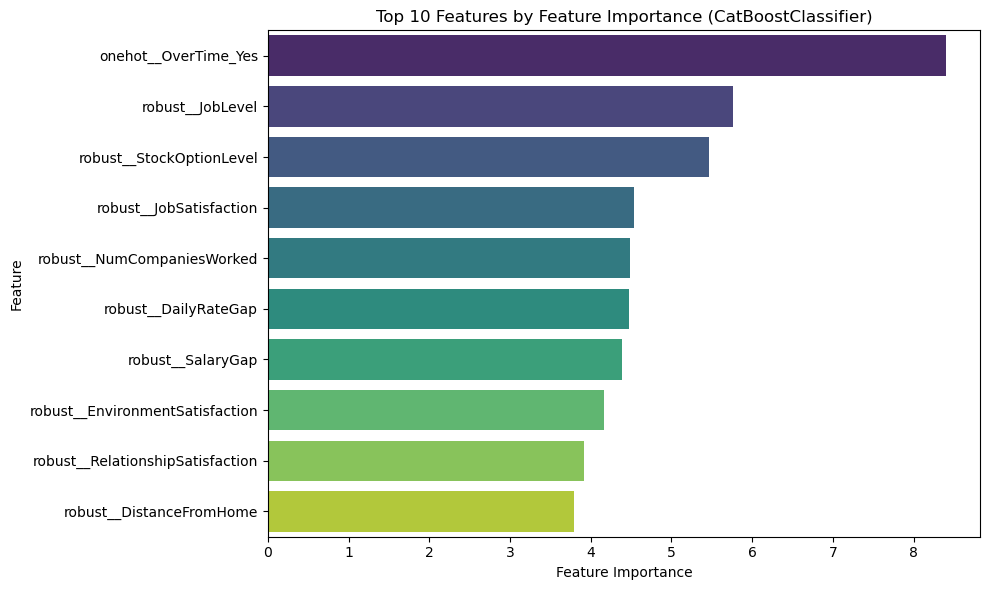

In [93]:
from sklearn.inspection import permutation_importance
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_feature_importance(model_pipeline, X, y, top_n=10, random_state=42):
    """
    Plots top N feature importances for various model types, including KNN.
    
    Parameters:
    - model_pipeline: A trained scikit-learn pipeline object
    - X: Feature matrix (pre-transformation)
    - y: Target vector
    - top_n: Number of top features to display
    - model_name: Name of the model (for the plot title)
    - random_state: Random seed for permutation importance
    """
    # Get transformed feature names
    try:
        feature_names = model_pipeline.named_steps['preprocessing'].get_feature_names_out()
    except AttributeError:
        feature_names = np.array([f'Feature {i}' for i in range(X.shape[1])])
    
    model = model_pipeline.named_steps['model']
    
    # Handle different model types
    if hasattr(model, 'coef_'):  # Linear models
        importances = np.abs(model.coef_[0])
        importance_type = "Coefficient Magnitude"
    elif hasattr(model, 'feature_importances_'):  # Tree-based models
        importances = model.feature_importances_
        importance_type = "Feature Importance"
    else:  # For KNN and other models without native importance
        # Calculate permutation importance
        X_transformed = model_pipeline.named_steps['preprocessing'].transform(X)
        result = permutation_importance(
            model, X_transformed, y, 
            n_repeats=10, 
            random_state=random_state
        )
        importances = result.importances_mean
        importance_type = "Permutation Importance"
    
    # Create DataFrame
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances,
        'Importance_Type': importance_type
    }).sort_values('Importance', ascending=False)

    # # Display top N
    # print(f"\nTop {top_n} Features by {importance_type}:")
    # print(importance_df.head(top_n))
    
    # Plot
    plt.figure(figsize=(10, 6))
    sns.barplot(
        x='Importance', 
        y='Feature', 
        data=importance_df.head(top_n), 
        palette='viridis'
    )
    plt.title(f'Top {top_n} Features by {importance_type} ({type(model_pipeline.steps[-1][1]).__name__})')
    plt.xlabel(importance_type)
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.show()

# Usage example:
plot_feature_importance(
    pipe_basic, 
    X=X_train,  # Your raw training features (before scaling)
    y=y_train, 
    top_n=10)

<div style="text-align: middle;">
  <h3 id="lime" style="background-color:rgb(32, 1, 39); color: white; padding: 10px 10px; margin-bottom: 10px; border-radius: 8px; font-weight: bold; display: inline-block; font-size: 20px">LIME</h3>
</div>

LIME helps you understand why a model made a specific prediction by showing which features influenced that prediction the most.

In [94]:
import lime
from lime import lime_tabular

# Base Classifier

rf_lime = best_model.named_steps['model']
# Extract the preprocessing transformer (adjust based on your pipeline structure)
preprocessor = pipe_tune.named_steps['preprocessing']

# Apply the preprocessing to the test set
X_test_transformed = preprocessor.transform(X_test)


best_model.fit(X_train, y_train)
accuracy_score = rf_lime.score(X_test_transformed, y_test) # accuracy score (doesn't matter much if the data imbalance)
accuracy_score

0.8067796610169492

In [95]:
X_train_transformed = preprocessor.transform(X_train)

# Explainer based
explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train_transformed),
    feature_names=preprocessor.get_feature_names_out(),
    mode='classification'
)

pred = best_model.predict(X_test.iloc[[0]])[0] # predict data from row 0
print(f'Data from row 0 test will result : {pred}')

Data from row 0 test will result : 0


In [96]:
# Select an instance to explain
instance_idx = 0
instance_to_explain = X_test_transformed[instance_idx]

# Generate explanation for the selected instance
explanation = explainer.explain_instance(
    instance_to_explain,
    rf_lime.predict_proba,  # Use `model.predict` for regression tasks
    num_features=10
)

# Display the explanation
explanation.show_in_notebook(show_table=True)

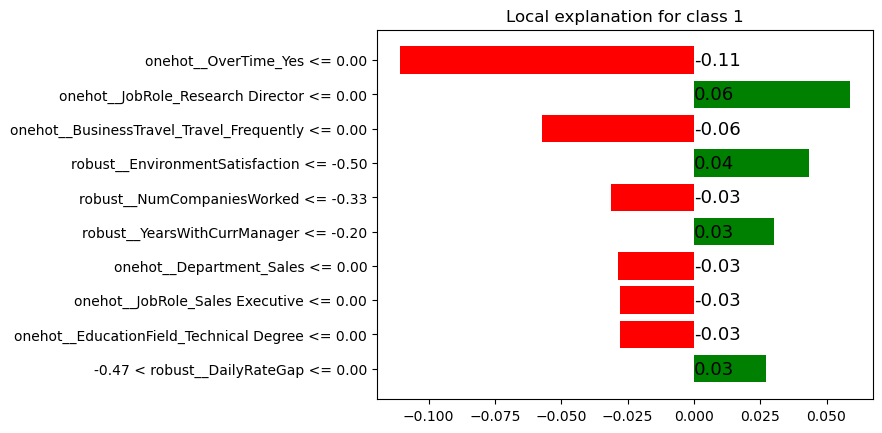

In [97]:
# Plot the explanation
fig = explanation.as_pyplot_figure()

# Extract only the importance scores from exp.as_list()
feature_importances = explanation.as_list()
importance_scores = [importance for _, importance in feature_importances]
importance_scores_sorted = sorted(importance_scores, key=lambda x: abs(x), reverse=False)

# Annotate the plot with the importance scores
for i, importance in enumerate(importance_scores_sorted):
    plt.annotate(
        f'{importance:.2f}',  # Importance score to annotate
        xy=(0, 0),  # Position based on the importance and feature index
        xytext=(0 , i+round(sum(importance_scores_sorted) / len(importance_scores_sorted),2)+0.5),  # Offset to the right for better readability
        ha='left',  # Horizontal alignment
        va='center',  # Vertical alignment
        fontsize=13,  # Font size for clarity
    )

# Show the plot
plt.show()


How to read :

Data from row 0 in dataset, for column JobRole Sales Representative contribute -0.24 to predict class 0

<div style="text-align: middle;">
  <h3 id="shap" style="background-color:rgb(32, 1, 39); color: white; padding: 10px 10px; margin-bottom: 10px; border-radius: 8px; font-weight: bold; display: inline-block; font-size: 20px">SHAP</h3>
</div>
SHAP tells you how much each feature contributes (positively or negatively) to a prediction, using solid mathematical guarantees.

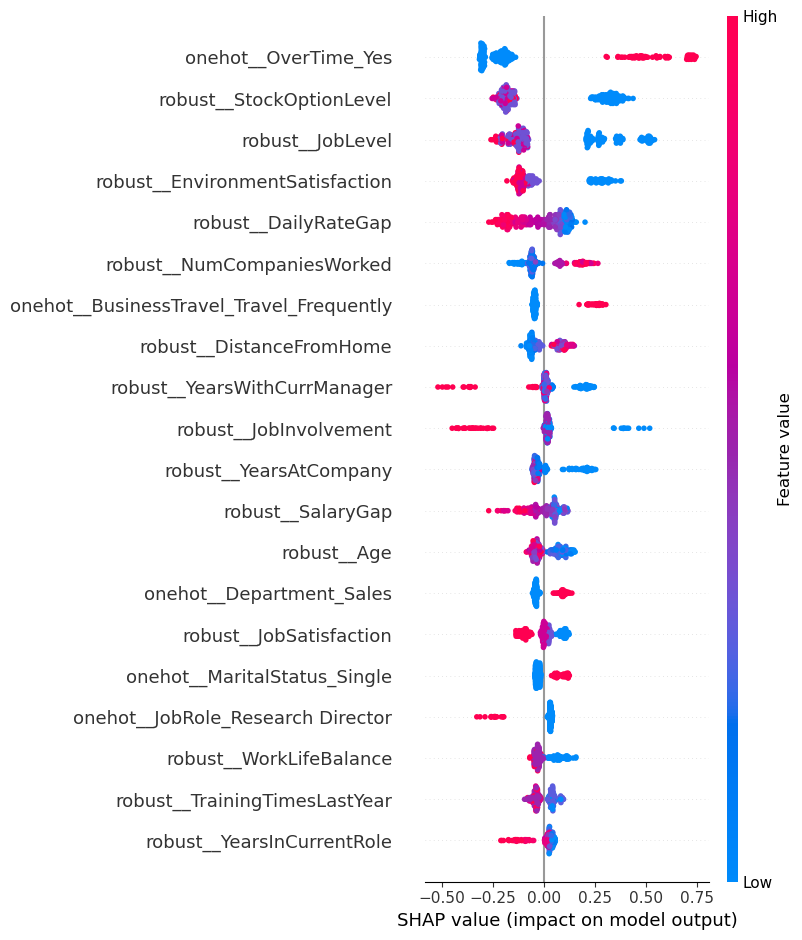

In [98]:
import shap


def explain_model_with_shap(pipeline, X_test, sample_size=1000, random_state=42):
    """
    Automatically selects SHAP explainer depending on the model type.
    
    Parameters:
    - pipeline: trained sklearn pipeline
    - X_test: raw test feature DataFrame
    - sample_size: number of samples to use for explanation (to reduce compute time)
    """
    # Extract steps
    preprocessor = pipeline.named_steps.get('preprocessing') or pipeline.named_steps.get('transformer')
    model = pipeline.named_steps.get('model') or pipeline.named_steps.get('modeling')
    
    # Transform X_test using preprocessor
    if preprocessor:
        X_test_transformed = preprocessor.transform(X_test)
        if hasattr(preprocessor, 'get_feature_names_out'):
            feature_names = preprocessor.get_feature_names_out()
        else:
            feature_names = [f'Feature {i}' for i in range(X_test_transformed.shape[1])]
    else:
        X_test_transformed = X_test.values
        feature_names = X_test.columns

    # Convert sparse to dense if needed
    if hasattr(X_test_transformed, 'toarray'):
        X_test_transformed = X_test_transformed.toarray()

    # Create DataFrame
    X_test_df = pd.DataFrame(X_test_transformed, columns=feature_names)
    X_sample = shap.sample(X_test_df, sample_size, random_state=random_state)

    # Choose appropriate SHAP explainer
    try:
        explainer = shap.Explainer(model, X_sample)
        shap_values = explainer(X_sample)
    except Exception as e:
        print(f"Falling back to KernelExplainer due to: {e}")
        explainer = shap.KernelExplainer(model.predict, X_sample)
        shap_values = explainer.shap_values(X_sample)

    # Plot summary
    shap.summary_plot(shap_values, X_sample, feature_names=feature_names)

# Example usage:
explain_model_with_shap(pipe_tune, X_test)


We can see from each feature, which one is impacting the prediction.

For example in SalarySlab up to 5K is a determining factor. If the feature is 0 (i.e., salary is belo 5K), the prediction leans towards Class 1.

<div style="text-align: middle;">
  <h2 id="save-model" style="background-color:rgb(32, 1, 39); color: white; padding: 10px 10px; margin-bottom: 10px; border-radius: 8px; font-weight: bold; display: inline-block; font-size: 20px">Save Model</h2>
</div>

#### Exporting Model Including Threshold

In [ ]:
import pickle
from sklearn.base import BaseEstimator, ClassifierMixin
import numpy as np

class ThresholdClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, model, threshold=0.5):
        self.model = model
        self.threshold = threshold
    
    def fit(self, X, y):
        self.model.fit(X, y)
        return self
    
    def predict(self, X):
        # Get probabilities for positive class only
        proba = self.model.predict_proba(X)[:, 1]  # Only take column 1 (positive class)
        return (proba >= self.threshold).astype(int)
    
    def predict_proba(self, X):
        return self.model.predict_proba(X)
    
    def get_params(self, deep=True):
        return {"model": self.model, "threshold": self.threshold}

# Usage example:

# 1. Wrap your model
custom_model = ThresholdClassifier(best_model, threshold=best_threshold)

# 2. Fit (if not already fitted)
if not hasattr(best_model, 'classes_'):
    custom_model.fit(X, y)

# 3. Export
with open('dataset/model_with_threshold.pkl', 'wb') as f:
    pickle.dump(custom_model, f)

# 4. Load and predict
with open('dataset/model_with_threshold.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

y_pred = loaded_model.predict(X_test)
y_pred

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0])

In [100]:
len(y_pred)

295

In [101]:
y_test.iloc[0]

0

In [102]:
y_pred_one = loaded_model.predict(X_test.iloc[[0]])
y_pred_one

array([0])

#### Export Model without Threshold

In [ ]:
import pickle

# Save model

#fit
best_model.fit(X, y)


filename = 'Prediction_Model.sav'

# save with pickle
pickle.dump(best_model, open(f'dataset/{filename}', 'wb'))

# Load model
loaded_model = pickle.load(open(f'dataset/{filename}', 'rb'))
loaded_model

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipe_ordinal_robust',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder(mapping=[{'col': 'AgeGroup',
                                                                                            'data_type': dtype('O'),
                                                                                            'mapping': 55+      1
46-55    2
36-45    3
26-35    4
18-25    5
dtype: int64}])),
                                                                  ('robust',
                                                                   RobustScaler())]),
                                                  ['AgeGroup']),
                                                 ('robust', RobustScaler(),
                                                  ['Age', 'DailyRateGap',
                                                   'Di...
                                                   'YearsInCurrentRole',
                                                   'YearsSinceLastPromotion',
                                                   'YearsWithCurrManager']),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['BusinessTravel',
                                                   'Department',
                                                   'EducationField', 'Gender',
                                                   'JobRole', 'MaritalStatus',
                                                   'SalarySlab',
                                                   'OverTime'])])),
                ('resampler', RandomOverSampler(random_state=42)),
                ('model',
                 <catboost.core.CatBoostClassifier object at 0x15dcbf740>)])

In [104]:
loaded_model.predict(X_test.iloc[[0]])

array([0])

<div style="text-align: center;">
  <h1 id='B.-Regression' style="background-color:#3e497a; color: white; padding: 10px 20px; margin-bottom: 20px; border-radius: 10px; font-weight: bold;">B. Regression</h1>
</div>
<a id="regression"></a>

<a href="#A.-Clasification">Jump to : Clasification</a></li>

<a href="#B.-Regression">Jump to : Regression</a></li>

<div style="text-align: left;">
  <h2 id="define-X-and-y-reg" style="background-color:rgb(5, 10, 63); color: white; padding: 10px 20px; margin-bottom: 20px; border-radius: 8px; font-weight: bold; display: inline-block; font-size: 30px">Define X and y</h2>
</div>

X is all feature we will be using to predict

y is the target of prediction

<div style="display: flex; justify-content: center; margin: 20px 0;">
  <div style="border: 2px solid; border-radius: 8px; padding: 10px 15px; width: fit-content; max-width: 90%;">
    <code><strong>Function to use:</strong> define_X_y(df, target=target_overal, drop_cols=[])</code>
  </div>
</div>


In [105]:
# Fill this first, it will be used for many function to cleaning and splitting
target_overal = 'Price'

In [106]:
file1 = 'dataset/clean_dataset_reg.csv'
df_reg = pd.read_csv(file1,sep=',') # use sep= "," or ";" if the data not properly exported
df_reg.head()

Type          Region     Make  Gear_Type Origin    Options  Year  \
0      Yukon          Riyadh      GMC  Automatic  Saudi       Full  2014   
1     Optima  Hafar Al-Batin      Kia  Automatic  Saudi  Semi Full  2015   
2        CX3            Abha    Mazda  Automatic  Saudi  Semi Full  2019   
3  Cayenne S          Riyadh  Porsche  Automatic  Saudi       Full  2012   
4     Sonata          Riyadh  Hyundai  Automatic  Saudi       Full  2016   

   Engine_Size  Mileage  Negotiable   Price  
0          8.0    80000       False  120000  
1          2.4   220000       False   42000  
2          2.0    25000       False   58000  
3          4.8   189000       False   85000  
4          2.4      155       False   48000

In [107]:
def define_X_y(df, target=target_overal, drop_cols=[]):
    X = df.drop(columns=drop_cols + [target])
    y = df[target]
    print(f'X Column : {list(X.columns)}')
    print(f'y Column : {list(y)}')
    return X, y

X, y = define_X_y(df_reg, target=target_overal, drop_cols=['Negotiable'])

X Column : ['Type', 'Region', 'Make', 'Gear_Type', 'Origin', 'Options', 'Year', 'Engine_Size', 'Mileage']
y Column : [120000, 42000, 58000, 85000, 48000, 81500, 55000, 145000, 38000, 140000, 65000, 76000, 32000, 23000, 42000, 20000, 23000, 45000, 30000, 149000, 179000, 22000, 55000, 49500, 52000, 25000, 72000, 105000, 99000, 57000, 140000, 72000, 110000, 55000, 56500, 90000, 71500, 29000, 62000, 141000, 60000, 93000, 68000, 50000, 69000, 121500, 38000, 51000, 109000, 48000, 47000, 88000, 15000, 20000, 47000, 142000, 53000, 39000, 58000, 78500, 60000, 60000, 35000, 30000, 45000, 45500, 125000, 63000, 63000, 80000, 60000, 44000, 54000, 37000, 35000, 79000, 70000, 81000, 48000, 68500, 80000, 33500, 33000, 118000, 36500, 32000, 63000, 65000, 57000, 48000, 75000, 61500, 25000, 32000, 45000, 44500, 35000, 39000, 99000, 29000, 32000, 60000, 37000, 125000, 107000, 102000, 50000, 99500, 58000, 122000, 65000, 23000, 21000, 77000, 88000, 52000, 77000, 100000, 58000, 59500, 105000, 45000, 30000, 5

<div style="text-align: left;">
  <h2 id="data-splitting" style="background-color:rgb(5, 10, 63); color: white; padding: 10px 20px; margin-bottom: 20px; border-radius: 8px; font-weight: bold; display: inline-block; font-size: 30px">Data Splitting</h2>
</div>

In regression we don't need stratify because how we can split the data?

In [108]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
                                                    X,y,
                                                    test_size=0.2,
                                                    random_state=0,
)

print('Data Splitting Preview')
preview_data = pd.DataFrame({
    'Category' : ['X_train', 'y_train', 'X_test', 'y_test'],
    'Row' : [X_train.shape[0],  y_train.shape[0], X_test.shape[0], y_test.shape[0]],
    'Column' : [int(X_train.shape[1]), 0, int(X_test.shape[1]), 0]
})
preview_data

Data Splitting Preview


Category   Row  Column
0  X_train  2553       9
1  y_train  2553       0
2   X_test   639       9
3   y_test   639       0

<div style="text-align: left;">
  <h2 id="preprocessing" style="background-color:rgb(5, 10, 63); color: white; padding: 10px 20px; margin-bottom: 20px; border-radius: 8px; font-weight: bold; display: inline-block; font-size: 30px">Preprocessing</h2>
</div>

Separate the column into category, which one will use encoding or scaling

| **Category** | **Method**             | **Description**                                                              |
|--------------|------------------------|------------------------------------------------------------------------------|
| **Encoding** | OneHotEncoder          | Nominal categorical features (no order)                                     |
|              | OrdinalEncoder         | Ordinal categorical features (with order)                                   |
|              | BinaryEncoder           | Encodes categories into binary digits (useful for high cardinality features)|
| **Scaling**  | StandardScaler         | Normally distributed numeric features                                       |
|              | MinMaxScaler           | Scales values between 0–1                                                   |
|              | RobustScaler           | Handles outliers by using median/IQR                                        |

In [109]:
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder, MinMaxScaler
from category_encoders import OrdinalEncoder, BinaryEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Fill column name here

Binary = ['Type','Region','Make']

One_Hot = ['Gear_Type','Origin']

Ordinal = ['Options']

Robust = ['Mileage','Engine_Size','Year']

ordinal_encoding = [
    {  # Ranking: higher values indicate higher churn risk
        'col': 'Options',
        'mapping': {
            'Standard':1,
            'Semi Full': 2,
            'Full' : 3
        }
    },
    #     {  # Ranking: higher values indicate higher churn risk
    #     'col': 'cluster',
    #     'mapping': {
    #         'Low Risk': 1,
    #         'Medium Risk': 2,
    #         'High Risk' : 3
    #     }
    # }
]

pipe_ordinal_robust = Pipeline([
    ('ordinal',OrdinalEncoder(mapping=ordinal_encoding)),
    ('robust',RobustScaler())
])

# for filling NaN
# numeric_pipeline = Pipeline([
#     ('imputer', SimpleImputer(strategy='median')),
#     ('scaler', StandardScaler())
# ])

# categorical_pipeline = Pipeline([
#     ('imputer', SimpleImputer(strategy='most_frequent')),
#     ('encoder', OneHotEncoder(handle_unknown='ignore'))
# ])


transformer = ColumnTransformer([
    ('pipe_ordinal_robust', pipe_ordinal_robust, Ordinal),
    ('Binary',BinaryEncoder(),Binary),
    ('robust', RobustScaler(), Robust),
    ('onehot', OneHotEncoder(drop='first',handle_unknown='ignore'), One_Hot)
], remainder='passthrough')


In [110]:
transformed_array = transformer.fit_transform(X_train)
transformed_array[0]

array([ 0.5       ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        1.        , -0.18766472,  0.44444444,  0.25      ,  0.        ,
        0.        ,  1.        ,  0.        ])

In [111]:
preview_data['Final Features'] = [len(transformed_array[0]),1,len(transformed_array[0]),1]
preview_data

Category   Row  Column  Final Features
0  X_train  2553       9              28
1  y_train  2553       0               1
2   X_test   639       9              28
3   y_test   639       0               1

<div style="text-align: left;">
  <h2 id="cross-validation-reg" style="background-color:rgb(5, 10, 63); color: white; padding: 10px 20px; margin-bottom: 20px; border-radius: 8px; font-weight: bold; display: inline-block; font-size: 30px">Cross Validation</h2>
</div>

| **Metric**  | **Name**                       | **Goal** | **Description**                                                                      |
| ----------- | ------------------------------ | -------- | ------------------------------------------------------------------------------------ |
| `mse`       | Mean Squared Error             | Minimize | Average of squared prediction errors. Penalizes large errors more heavily.           |
| `rmse`      | Root Mean Squared Error        | Minimize | Square root of MSE. Same units as target; still sensitive to large errors.           |
| `mae`       | Mean Absolute Error            | Minimize | Average of absolute prediction errors. More robust to outliers than MSE.             |
| `mape`      | Mean Absolute Percentage Error | Minimize | Average of absolute percentage errors. Good for scale-independent comparisons.       |
| `r2`        | R-squared                      | Maximize | Proportion of variance explained by the model. 1.0 is perfect, can be negative.      |
| `evs`       | Explained Variance Score       | Maximize | How well the model explains the variance of the target. Similar to R².               |
| `max_error` | Maximum Error                  | Minimize | Worst-case error (largest absolute difference). Highlights worst prediction.         |
| `msle`      | Mean Squared Log Error         | Minimize | Like MSE, but penalizes underestimates more. Use when target has exponential growth. |
| `medae`     | Median Absolute Error          | Minimize | Median of absolute errors. Extremely robust to outliers.                             |


Cross-validation tests a model on different data splits to check its generalization. It helps avoid overfitting.

For regression we find the score lowest the better

<div style="display: flex; justify-content: center; margin: 20px 0;">
  <div style="border: 2px solid; border-radius: 8px; padding: 10px 15px; width: fit-content; max-width: 90%;">
    <code><strong>Function to use:</strong> get_scorers_reg(metrics=[''])/code>
  </div>
</div>

In [112]:
def get_scorers_reg(metrics=None):
    builtin_scorers = {
        "mse": "neg_mean_squared_error",
        "rmse": "neg_root_mean_squared_error",
        "mae": "neg_mean_absolute_error",
        "mape": "neg_mean_absolute_percentage_error",
        "msle": "neg_mean_squared_log_error",
        "medae": "neg_median_absolute_error",
        "r2": "r2",
        "evs": "explained_variance",
        "max_error": "max_error"
    }

    if metrics is None:
        return builtin_scorers
    else:
        return {m: builtin_scorers[m] for m in metrics if m in builtin_scorers}

    
# Example usage
scorers = get_scorers_reg(metrics=['rmse', 'mae', 'r2', 'mape', 'max_error'])
scorers

{'rmse': 'neg_root_mean_squared_error',
 'mae': 'neg_mean_absolute_error',
 'r2': 'r2',
 'mape': 'neg_mean_absolute_percentage_error',
 'max_error': 'max_error'}

In [113]:
# Import necessary models
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_validate
from sklearn.ensemble import VotingClassifier


# 1. Linear Models
linear_reg = LinearRegression()
lasso = Lasso()
ridge = Ridge()

# 2. Tree-Based Models
decision_tree = DecisionTreeRegressor(random_state=42)
random_forest = RandomForestRegressor(random_state=42)
gradient_boost = GradientBoostingRegressor(random_state=42)

# 3. Boosting Libraries
xgboost_reg = XGBRegressor(random_state=42)
catboost_reg = CatBoostRegressor(random_seed=42,used_ram_limit="8GB",verbose = False)
lightgbm_reg = LGBMRegressor(random_state=42, verbose=-1)

# 4. k-NN & Nearest Neighbors
knn_reg = KNeighborsRegressor(n_neighbors=5)


# Define models (including Voting Classifier)
models = {
    "Linear_Regression": linear_reg,
    "Lasso": lasso,
    "Ridge": ridge,
    "Decision_Tree": decision_tree,

    "Random_Forest": random_forest,
    "Gradient_Boost": gradient_boost,

    "XGBoost_Reg": xgboost_reg,
    "Catboost_reg": catboost_reg,
    "LightGBM": lightgbm_reg,
    "KNN": knn_reg,
    
    # "Voting_Classifier": VotingClassifier(estimators=[
    #     # ('clf1', log_reg),
    #     ('clf2', random_forest),
    #     ('clf3', gradient_boost),
    #     ('clf4', lightgbm_reg),
    #     ('clf5', xgboost_reg)
    # ])
}

results = []
for model_name, model in models.items():
    # Build the pipeline
    pipe = Pipeline([
        ('preprocessing', transformer),
        ('model', model)
    ])
    
    # Run cross-validation with multiple scorers
    cv_results = cross_validate(pipe, X_train, y_train, cv=5, scoring=scorers)
    
    # Start building the result dictionary with model name
    result_dict = {"Model": model_name}

    # Loop through each scorer to get mean and std values
    for scorer in scorers:
        mean = cv_results[f"test_{scorer}"].mean()
        std = cv_results[f"test_{scorer}"].std()
        if scorer in ['rmse','mae','max_error','mape']:
        # if scorer in negated:
            mean *= -1
        result_dict[f"{scorer} Mean"] = round(mean, 2)
        result_dict[f"{scorer} Std"] = round(std, 2)

    
    # Append the result dictionary to the results list
    results.append(result_dict)

# Convert to DataFrame, change the order by scorer you choose
df_results = pd.DataFrame(results).sort_values(by='mae Mean')

# Print results
df_results


Model  rmse Mean  rmse Std  mae Mean  mae Std  r2 Mean  r2 Std  \
7       Catboost_reg   15713.35    729.31  10300.28   239.46     0.83    0.02   
8           LightGBM   17079.46   1123.57  11229.83   401.05     0.80    0.02   
6        XGBoost_Reg   17865.10    871.38  11796.38   457.69     0.78    0.02   
4      Random_Forest   18890.08    935.31  12356.34   259.34     0.76    0.02   
5     Gradient_Boost   19815.34    438.43  13706.86   243.55     0.73    0.02   
9                KNN   20865.13   1296.01  14299.77   702.61     0.70    0.04   
3      Decision_Tree   25989.82   1766.21  16649.61   565.26     0.54    0.06   
2              Ridge   25994.39    827.34  19399.73   557.58     0.54    0.03   
1              Lasso   25996.38    827.18  19401.02   556.78     0.54    0.03   
0  Linear_Regression   25997.41    827.17  19402.18   556.32     0.54    0.03   

   mape Mean  mape Std  max_error Mean  max_error Std  
7       0.18      0.01        92962.12       14960.62  
8       0.19      0.01        99506.87       20278.42  
6       0.20      0.01       109789.29       15454.06  
4       0.22      0.02       107414.00       11109.90  
5       0.24      0.01       102558.63       13795.77  
9       0.26      0.02        99640.00        9853.65  
3       0.28      0.02       134400.00       24162.78  
2       0.36      0.02       102974.97       10887.95  
1       0.36      0.02       102993.75       10935.20  
0       0.36      0.02       102991.66       10937.30

<div style="text-align: left;">
  <h2 id="select-best-model" style="background-color:rgb(5, 10, 63); color: white; padding: 10px 20px; margin-bottom: 20px; border-radius: 8px; font-weight: bold; display: inline-block; font-size: 30px">Select Best Model</h2>
</div>

Select which model you want to choose for further Hyperparameter, we will test to X_train to find which model the best

In [114]:
# Select model and scorer
BEST_3_MODEL = list(df_results['Model'])[:3]
BEST_3_MODEL

['Catboost_reg', 'LightGBM', 'XGBoost_Reg']

In [115]:
from sklearn.model_selection import cross_val_score

results = []

# Assuming BEST_3_MODEL contains the list of models
for model_top in BEST_3_MODEL:
    model = models[model_top]

    pipe = Pipeline([
        ('preprocessing', transformer),
        ('model', model)
    ])

    row = {'Model': model_top}
    negated = ['neg_root_mean_squared_error', 'neg_mean_absolute_error',
               'neg_mean_absolute_percentage_error', 'neg_mean_squared_error',
               'neg_median_absolute_error', 'neg_mean_squared_log_error', 'max_error']
    
    for name_scorer, scorer in scorers.items():
        scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring=scorer)
        mean_score = scores.mean()

        # Invert sign for neg_ metrics
        if scorer in negated:
            mean_score *= -1

        # Assign the score to the correct scorer name
        row[name_scorer] = round(mean_score, 2)

    results.append(row)

# Convert to DataFrame
df_results = pd.DataFrame(results)
df_results.set_index('Model', inplace=True)
df_results = df_results[scorers.keys()]  # Ensure the columns are ordered based on the scorer names
df_results.sort_values(by='mae')
df_results


rmse       mae    r2  mape  max_error
Model                                                  
Catboost_reg  15713.35  10300.28  0.83  0.18   92962.12
LightGBM      17079.46  11229.83  0.80  0.19   99506.87
XGBoost_Reg   17865.10  11796.38  0.78  0.20  109789.29

In [116]:
SELECTED_MODEL = 'Catboost_reg'
# Model Available : 'Catboost_reg','LightGBM','XGBoost_Reg','Random_Forest','Gradient_Boost','KNN','Decision_Tree','Ridge','Lasso','Linear_Regression'

SELECTED_SCORER = 'mae'  # Change this to any key from scorers dictionary (choose only 1 to focus)
# Scorer Available = "mse", "rmse", "mae", "mape", "msle", "medae", "r2", "evs", "max_error"

<div style="text-align: left;">
  <h2 id="hyperparameter-tuning-reg" style="background-color:rgb(5, 10, 63); color: white; padding: 10px 20px; margin-bottom: 20px; border-radius: 8px; font-weight: bold; display: inline-block; font-size: 30px">Hyperparameter Tuning</h2>
</div>

Paramater for each model already provided, you can edit param the model you choose on param_distributions variable

In [117]:
from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

# Define parameter distributions for each model type
param_distributions = {
    'Catboost_reg': {
        'model__iterations': [500, 1000, 2000],  # Number of boosting rounds (trees to build)
        'model__learning_rate': [0.01, 0.05, 0.1],  # Step size shrinkage used in each iteration
        'model__depth': [4, 6, 8],  # Maximum depth of the trees
        'model__l2_leaf_reg': [1, 3, 5, 10],  # L2 regularization term on leaf weights (controls overfitting)
        'model__bagging_temperature': [0.5, 1.0, 2.0],  # Controls the randomness of bagging (higher = more random)
        'model__boosting_type': ['Plain', 'Ordered'],  # 'Plain' = standard boosting; 'Ordered' = reduces prediction shift (good for small data)
        'model__grow_policy': ['SymmetricTree', 'Depthwise', 'Lossguide']  # Strategy to grow trees: balanced (Symmetric), by depth, or by loss reduction

    },
    'LightGBM': {
        'model__n_estimators': [50, 100, 200, 500],  # Number of boosting rounds
        'model__max_depth': [3, 5, 7, 10, 12],  # Max depth of trees
        'model__learning_rate': [0.001, 0.01, 0.1, 0.3],  # Learning rate (shrinkage)
        'model__num_leaves': [20, 31, 50, 100],  # Max number of leaves per tree
        'model__min_child_samples': [5, 10, 20, 30]  # Minimum samples per leaf
    },
    'XGBoost_Reg': {
        'model__n_estimators': [50, 100, 200, 500],  # Number of boosting rounds
        'model__max_depth': [3, 5, 7, 10],  # Max depth of trees
        'model__learning_rate': [0.001, 0.01, 0.1, 0.3],  # Learning rate
        'model__subsample': [0.5, 0.7, 0.9, 1.0],  # Fraction of samples used per tree
        'model__colsample_bytree': [0.5, 0.7, 0.9, 1.0]  # Fraction of features per tree
    },
    'Random_Forest': {
        'model__n_estimators': [50, 100, 200, 500],  # Number of trees
        'model__max_depth': [3, 5, 10, 20, None],  # Max depth of trees
        'model__min_samples_split': [2, 5, 10, 20],  # Min samples to split node
        'model__min_samples_leaf': [1, 2, 5, 10],  # Min samples in leaf node
        'model__max_features': [0.1, 0.3, 0.5, 0.7, 0.9, 'sqrt', 'log2']  # Max features considered for split
    },
    'Gradient_Boost': {
        'model__n_estimators': [50, 100, 200, 500],  # Number of boosting rounds
        'model__learning_rate': [0.001, 0.01, 0.1, 0.3],  # Learning rate
        'model__max_depth': [3, 5, 7, 10],  # Max depth of each tree
        'model__min_samples_split': [2, 5, 10, 20],  # Min samples to split node
        'model__min_samples_leaf': [1, 2, 5, 10],  # Min samples in a leaf
        'model__subsample': [0.5, 0.7, 0.9, 1.0]  # Fraction of data per boosting step
    },
    'KNN': {
        'model__n_neighbors': [3, 5, 10, 15, 20, 25, 30],  # Number of nearest neighbors
        'model__weights': ['uniform', 'distance'],  # Weight function (equal or distance-based)
        'model__p': [1, 2, 3]  # Power parameter for Minkowski distance (1=Manhattan, 2=Euclidean)
    },
    'Decision_Tree': {
        'model__max_depth': [3, 5, 10, 15, 20, None],  # Max depth of tree
        'model__min_samples_split': [2, 5, 10, 20],  # Min samples to split a node
        'model__min_samples_leaf': [1, 2, 5, 10],  # Min samples required at leaf
        'model__criterion': ['squared_error', 'friedman_mse']  # Function to measure split quality
    },
    'Ridge': {
        'model__alpha': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
        'model__solver': ['auto', 'svd', 'cholesky', 'saga']  # Algorithm for optimization
    },
    'Lasso': {
        'model__alpha': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
        'model__max_iter': [500, 1000, 2000],  # Max iterations for optimization
        'model__selection': ['cyclic', 'random']  # Coordinate descent strategy
    },
    'Linear_Regression': {
        'model__fit_intercept': [True, False],  # Whether to include intercept
        'model__positive': [True, False]  # Whether to constrain coefficients to be >= 0
    }

}


# Create pipeline
pipe = Pipeline([
    ('preprocessing', transformer),
    ('model', models[SELECTED_MODEL])
])

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    n_iter=40, # how much iteration
    estimator=pipe,
    param_distributions=param_distributions[SELECTED_MODEL],
    scoring=list(scorers.values()),
    refit=scorers[SELECTED_SCORER],
    cv=5,
    n_jobs=-1,
    random_state=42,
    verbose=0
)


grid_search = GridSearchCV(
    estimator = pipe,
    cv = 5,
    scoring = list(scorers.values()),
    refit=scorers[SELECTED_SCORER],  # Uses the same metric as scoring
    n_jobs= -1,
    param_grid= param_distributions[SELECTED_MODEL]   
)

# Fit the model
selected_search = random_search # choose here between random_search or grid_search
selected_search.fit(X_train, y_train)

# Best parameters and model
best_model = selected_search.best_estimator_
print("Best score:", selected_search.best_score_)
print("Best parameters:")
df_hyper = pd.DataFrame({'Parameter' : selected_search.best_params_.keys(),'Setting' :selected_search.best_params_.values()})
df_hyper

Best score: -10112.868565066956
Best parameters:


Parameter        Setting
0        model__learning_rate           0.05
1          model__l2_leaf_reg              5
2           model__iterations           2000
3          model__grow_policy  SymmetricTree
4                model__depth              8
5        model__boosting_type          Plain
6  model__bagging_temperature            0.5

In [118]:
result_test = pd.DataFrame(selected_search.cv_results_)
print(f'Model : {SELECTED_MODEL}, Main Scorer : {SELECTED_SCORER}')

result_test = result_test.loc[:, ~result_test.columns.str.startswith(('split', 'std'))]
result_test.sort_values(by='rank_test_neg_mean_absolute_error').head(3)

Model : Catboost_reg, Main Scorer : mae


mean_fit_time  mean_score_time  param_model__learning_rate  \
26      17.645256         0.016136                        0.05   
23       4.078336         0.070120                        0.05   
14      26.097126         0.020107                        0.10   

    param_model__l2_leaf_reg  param_model__iterations  \
26                         5                     2000   
23                         1                     1000   
14                         1                     2000   

   param_model__grow_policy  param_model__depth param_model__boosting_type  \
26            SymmetricTree                   8                      Plain   
23            SymmetricTree                   6                      Plain   
14            SymmetricTree                   6                    Ordered   

    param_model__bagging_temperature  \
26                               0.5   
23                               2.0   
14                               1.0   

                                                                                                                                                                                                               params  \
26   {'model__learning_rate': 0.05, 'model__l2_leaf_reg': 5, 'model__iterations': 2000, 'model__grow_policy': 'SymmetricTree', 'model__depth': 8, 'model__boosting_type': 'Plain', 'model__bagging_temperature': 0.5}   
23   {'model__learning_rate': 0.05, 'model__l2_leaf_reg': 1, 'model__iterations': 1000, 'model__grow_policy': 'SymmetricTree', 'model__depth': 6, 'model__boosting_type': 'Plain', 'model__bagging_temperature': 2.0}   
14  {'model__learning_rate': 0.1, 'model__l2_leaf_reg': 1, 'model__iterations': 2000, 'model__grow_policy': 'SymmetricTree', 'model__depth': 6, 'model__boosting_type': 'Ordered', 'model__bagging_temperature': 1.0}   

    mean_test_neg_root_mean_squared_error  \
26                          -15477.025384   
23                          -15645.723595   
14                          -15427.148023   

    rank_test_neg_root_mean_squared_error  mean_test_neg_mean_absolute_error  \
26                                      2                      -10112.868565   
23                                      3                      -10259.596003   
14                                      1                      -10394.101317   

    rank_test_neg_mean_absolute_error  mean_test_r2  rank_test_r2  \
26                                  1      0.836872             2   
23                                  2      0.833269             3   
14                                  3      0.838200             1   

    mean_test_neg_mean_absolute_percentage_error  \
26                                     -0.176986   
23                                     -0.176376   
14                                     -0.182181   

    rank_test_neg_mean_absolute_percentage_error  mean_test_max_error  \
26                                             2        -93127.636220   
23                                             1        -95988.233322   
14                                             4        -88729.054906   

    rank_test_max_error  
26                    4  
23                   10  
14                    1

<div style="text-align: left;">
  <h2 id="model-evaluation" style="background-color:rgb(5, 10, 63); color: white; padding: 10px 20px; margin-bottom: 20px; border-radius: 8px; font-weight: bold; display: inline-block; font-size: 30px">Model Evaluation</h2>
</div>

In this part we will test the model initial and tuned to X Test to see the peformance

In [119]:
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, r2_score, 
    mean_absolute_percentage_error, mean_squared_log_error, 
    median_absolute_error, explained_variance_score, max_error
)

# Define model and pipeline
model_initial = models[SELECTED_MODEL]
best_model = best_model



# Assuming models, scorers, X_train, y_train, X_test are already defined

# Initialize result storage for each model
all_results = []

# Loop through models and evaluate
for model_name, model in zip(['Model Before Tuning', 'Model After Tuning'], [model_initial, best_model]):
    
    if model == best_model:
        # If it's the best model, use it directly (since it already includes preprocessing)
        Pipe_model = Pipeline([
            ('model', model)
        ])
    else:
        # For the initial model, include preprocessing in the pipeline
        Pipe_model = Pipeline([
            ('preprocessing', transformer),
            ('model', model)
        ])
    
    # Train the pipeline
    Pipe_model.fit(X_train, y_train)

    # Make predictions on X_test
    y_pred = Pipe_model.predict(X_test)

    # Store the results for this model
    results = {'Model': model_name}

    # Calculate each metric using the predictions on X_test
    # Metric calculation loop
    for name_scorer, scorer in scorers.items():
        if 'neg_' in scorer:
            if scorer == 'neg_mean_squared_error':  # mse
                results[name_scorer] = round(mean_squared_error(y_test, y_pred), 2)
            elif scorer == 'neg_root_mean_squared_error':  # rmse
                results[name_scorer] = round(np.sqrt(mean_squared_error(y_test, y_pred)), 2)
            elif scorer == 'neg_mean_absolute_error':  # mae
                results[name_scorer] = round(mean_absolute_error(y_test, y_pred), 2)
            elif scorer == 'neg_mean_absolute_percentage_error':  # mape
                results[name_scorer] = round(mean_absolute_percentage_error(y_test, y_pred), 4)
            elif scorer == 'neg_mean_squared_log_error':  # msle
                results[name_scorer] = round(mean_squared_log_error(y_test, y_pred), 2)
            elif scorer == 'neg_median_absolute_error':  # medae
                results[name_scorer] = round(median_absolute_error(y_test, y_pred), 2)
            else:
                results[name_scorer] = round(mean_squared_error(y_test, y_pred), 2)  # fallback
        else:
            if scorer == 'r2':
                results[name_scorer] = round(r2_score(y_test, y_pred), 2)
            elif scorer == 'explained_variance':  # evs
                results[name_scorer] = round(explained_variance_score(y_test, y_pred), 2)
            elif scorer == 'max_error':
                results[name_scorer] = round(max_error(y_test, y_pred), 2)
            else:
                results[name_scorer] = round(mean_squared_error(y_test, y_pred), 2)  # fallback
    # Append the results for this model to the list
    all_results.append(results)

# Convert the results into a DataFrame for easy viewing
score_df = pd.DataFrame(all_results)

print(f'Model : {best_model[-1].__class__.__name__} | Predict to Test')
score_df


Model : CatBoostRegressor | Predict to Test


Model      rmse      mae    r2    mape  max_error
0  Model Before Tuning  14862.80  10135.6  0.84  0.1834   71339.70
1   Model After Tuning  14606.18   9912.4  0.84  0.1840   71001.23

In [120]:
print('More Negative more better')
score_df_improvement = score_df
for metric in score_df.columns[1:] :
    score_df_improvement[f'{metric}_diff'] = score_df[metric].diff()
score_df_improvement

More Negative more better


Model      rmse      mae    r2    mape  max_error  rmse_diff  \
0  Model Before Tuning  14862.80  10135.6  0.84  0.1834   71339.70        NaN   
1   Model After Tuning  14606.18   9912.4  0.84  0.1840   71001.23    -256.62   

   mae_diff  r2_diff  mape_diff  max_error_diff  
0       NaN      NaN        NaN             NaN  
1    -223.2      0.0     0.0006         -338.47

<div style="text-align: left;">
  <h2 id="model-evaluation-reg" style="background-color:rgb(5, 10, 63); color: white; padding: 10px 20px; margin-bottom: 20px; border-radius: 8px; font-weight: bold; display: inline-block; font-size: 30px">Model Evaluation</h2>
</div>

| Method             | What It Does                                               | Pros                                    | Cons                                         |
| ------------------ | ---------------------------------------------------------- | --------------------------------------- | -------------------------------------------- |
| Residual Analysis  | Checks model errors: independence, constant variance, etc. | Validates key regression assumptions    | Needs visual inspection, subjective at times |
| Feature Importance | Shows which features most affect model predictions         | Simple, fast                            | Model-specific, no local explanation         |
| LIME               | Explains a single prediction with a local surrogate model  | Model-agnostic, local explanation       | Slower, may be unstable across runs          |
| SHAP               | Assigns each feature a contribution value per prediction   | Consistent, global & local explanations | Computationally expensive for large data     |




<div style="text-align: middle;">
  <h3 id="residual-analysis" style="background-color:rgb(5, 10, 63); color: white; padding: 10px 10px; margin-bottom: 10px; border-radius: 8px; font-weight: bold; display: inline-block; font-size: 20px">Residual Analysis</h3>
</div>

In Residual we need to check all this :

1. Independence of Errors (No Autocorrelation)

2. Homoscedasticity (Constant Variance of Errors)

3. Normality of Errors (Normal Distribution of Errors)

![Screenshot 2025-05-08 at 23.41.25.png](<attachment:Screenshot 2025-05-08 at 23.41.25.png>)
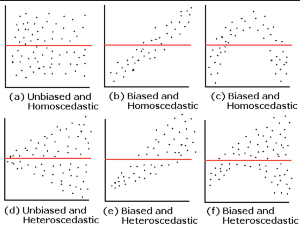

Durbin-Watson statistic: 1.9331520840318157


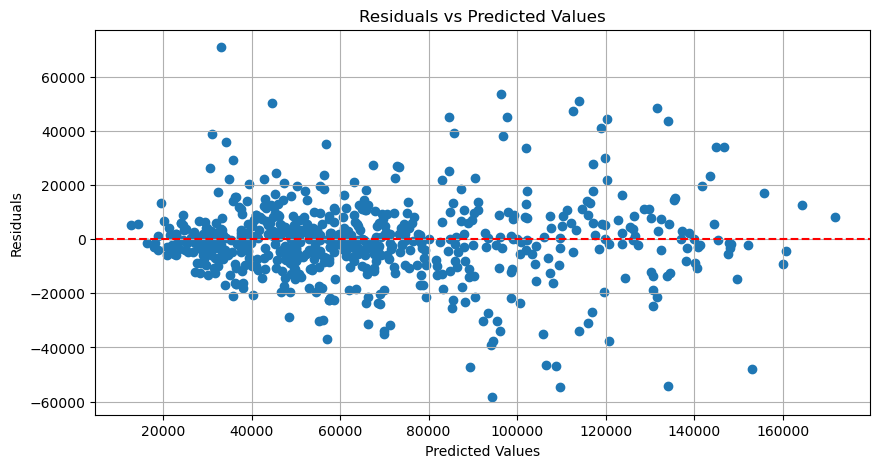


Shapiro-Wilk Test for Normality
p-value = 0.0000. p-value < 0.05. Reject Ho.
Residuals are NOT normally distributed.

Durbin-Watson within acceptable range. [Good]

⚠️ One or more residual diagnostics indicate potential issues. The model may violate key regression assumptions and require further refinement.


In [121]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.stattools import durbin_watson
from scipy.stats import shapiro

# Calculate residuals
residuals = y_test - y_pred
df_error = pd.DataFrame({'residual': residuals})

# Durbin-Watson Test: Check autocorrelation
dw_stat = durbin_watson(residuals)
print(f"Durbin-Watson statistic: {dw_stat}")

# Plot residuals vs predicted
plt.figure(figsize=(10, 5))
plt.scatter(y_pred, residuals)
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.grid(True)
plt.show()

# Ask user to visually check homoscedasticity
user_check = input("Do the residuals appear randomly scattered (suggesting homoscedasticity)? (yes/no): ").strip().lower()

# Shapiro-Wilk Test for normality
print("\nShapiro-Wilk Test for Normality")
Ho = "Residuals are normally distributed."
Ha = "Residuals are NOT normally distributed."

statistic, pvaluesw = shapiro(df_error['residual'])

if pvaluesw >= 0.05:
    print(f"p-value = {pvaluesw:.4f}. p-value >= 0.05. Fail to reject Ho.\n{Ho}")
    normality_passed = True
else:
    print(f"p-value = {pvaluesw:.4f}. p-value < 0.05. Reject Ho.\n{Ha}")
    normality_passed = False

# Combine all tests for conclusion
if dw_stat < 1.5 or dw_stat > 2.5:
    print("\nDurbin-Watson indicates potential autocorrelation. [Not Good]")
    dw_passed = False
else:
    print("\nDurbin-Watson within acceptable range. [Good]")
    dw_passed = True

if user_check != 'yes':
    print("User input suggests heteroscedasticity. [Not Good]")
    homo_passed = False
else:
    homo_passed = True

# Final verdict
if all([dw_passed, homo_passed, normality_passed]):
    print("\n✅ Residual diagnostics passed. Model assumptions appear valid.")
else:
    print("\n⚠️ One or more residual diagnostics indicate potential issues. The model may violate key regression assumptions and require further refinement.")

<div style="text-align: middle;">
  <h3 id="feature-importance-reg" style="background-color:rgb(5, 10, 63); color: white; padding: 10px 10px; margin-bottom: 10px; border-radius: 8px; font-weight: bold; display: inline-block; font-size: 20px">Feature Importance</h3>
</div>

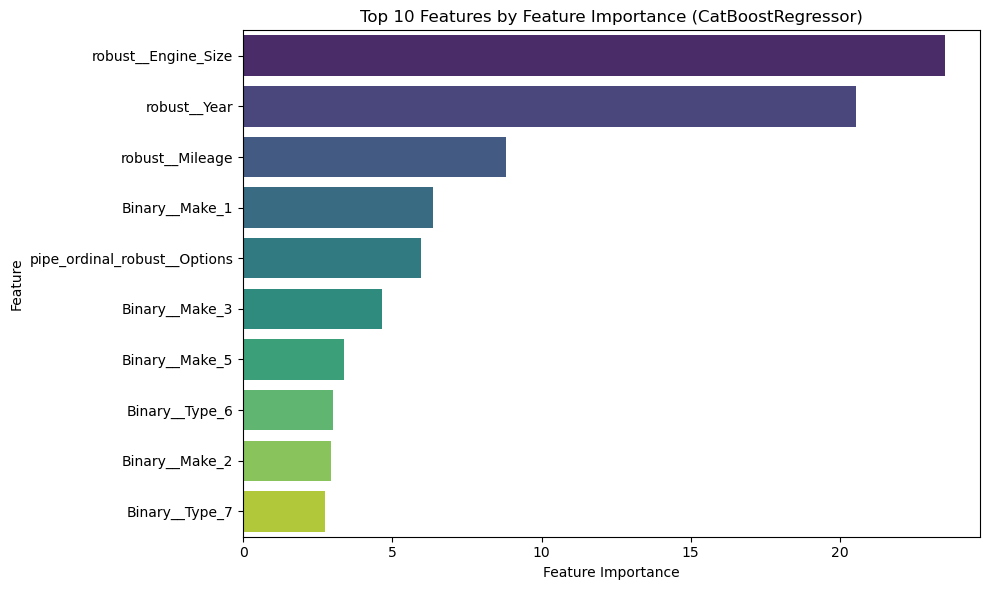

In [122]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

def plot_feature_importance(model_pipeline, X, y, top_n=10, random_state=42):
    """
    Plots top N feature importances for various model types, including CatBoost and KNN.

    Parameters:
    - model_pipeline: A trained scikit-learn pipeline object
    - X: Feature matrix (pre-transformation)
    - y: Target vector
    - top_n: Number of top features to display
    - random_state: Random seed for permutation importance
    """
    # Try to get feature names from 'transformer'
    try:
        transformer = model_pipeline.named_steps['preprocessing']
        X_transformed = transformer.transform(X)
        feature_names = transformer.get_feature_names_out()
    except:
        X_transformed = X
        feature_names = np.array([f'Feature {i}' for i in range(X.shape[1])])

    # Get model from pipeline
    model = model_pipeline.named_steps['model']

    # Determine importances
    if hasattr(model, 'coef_'):
        importances = np.abs(model.coef_[0])
        importance_type = "Coefficient Magnitude"

    elif hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        importance_type = "Feature Importance"

    else:
        result = permutation_importance(
            model, X_transformed, y,
            n_repeats=10,
            random_state=random_state
        )
        importances = result.importances_mean
        importance_type = "Permutation Importance"

    # Ensure lengths match
    if len(importances) != len(feature_names):
        raise ValueError(f"Feature names ({len(feature_names)}) and importances ({len(importances)}) have different lengths.")

    # Create and plot
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances,
        'Importance_Type': importance_type
    }).sort_values('Importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(
        x='Importance',
        y='Feature',
        data=importance_df.head(top_n),
        palette='viridis'
    )
    plt.title(f'Top {top_n} Features by {importance_type} ({type(model).__name__})')
    plt.xlabel(importance_type)
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.show()



# Usage example:
plot_feature_importance(
    best_model, 
    X=X_train,  # Your raw training features (before scaling)
    y=y_train, 
    top_n=10)

<div style="text-align: middle;">
  <h3 id="lime=reg" style="background-color:rgb(5, 10, 63); color: white; padding: 10px 10px; margin-bottom: 10px; border-radius: 8px; font-weight: bold; display: inline-block; font-size: 20px">LIME</h3>
</div>

LIME helps you understand why a model made a specific prediction by showing which features influenced that prediction the most.

In [123]:
import lime
from lime import lime_tabular
pipe_tune = best_model
# Base Classifier

rf_lime = best_model.named_steps['model']
# Extract the preprocessing transformer (adjust based on your pipeline structure)
preprocessor = pipe_tune.named_steps['preprocessing']

# Apply the preprocessing to the test set
X_test_transformed = preprocessor.transform(X_test)


best_model.fit(X_train, y_train)
accuracy_score = rf_lime.score(X_test_transformed, y_test) # accuracy score (doesn't matter much if the data imbalance)
accuracy_score

0.8411000085815288

In [124]:
X_train_transformed = preprocessor.transform(X_train)

# Explainer based
explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train_transformed),
    feature_names=preprocessor.get_feature_names_out(),
    mode='regression'
)

pred = best_model.predict(X_test.iloc[[0]])[0] # predict data from row 0
print(f'Data from row 0 test will result : {pred}')

Data from row 0 test will result : 96557.09022473713


In [125]:
# Select an instance to explain
instance_idx = 0
instance_to_explain = X_test_transformed[instance_idx]

# Generate explanation for the selected instance
explanation = explainer.explain_instance(
    instance_to_explain,
    rf_lime.predict,  # Use `model.predict` for regression tasks
    num_features=10
)

# Display the explanation
explanation.show_in_notebook(show_table=True)

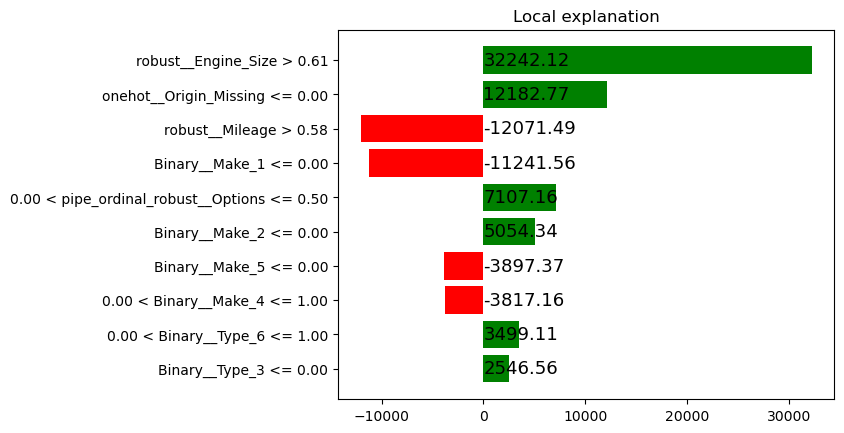

In [126]:
# Plot the explanation
fig = explanation.as_pyplot_figure()

# Extract only the importance scores from exp.as_list()
feature_importances = explanation.as_list()
importance_scores = [importance for _, importance in feature_importances]
importance_scores_sorted = sorted(importance_scores, key=lambda x: abs(x), reverse=False)

# Annotate the plot with the importance scores
for i, importance in enumerate(importance_scores_sorted):
    plt.annotate(
        f'{importance:.2f}',  # Importance score to annotate
        xy=(0, 0),  # Position based on the importance and feature index
        xytext=(0 , i+0.5),  # Offset to the right for better readability
        ha='left',  # Horizontal alignment
        va='center',  # Vertical alignment
        fontsize=13,  # Font size for clarity
    )

# Show the plot
plt.show()


How to read :

Data from row 0 in dataset, for column Robust Engize Size > 0.61 contribute 32.360 to final prediction

<div style="text-align: middle;">
  <h3 id="shap-reg" style="background-color:rgb(5, 10, 63); color: white; padding: 10px 10px; margin-bottom: 10px; border-radius: 8px; font-weight: bold; display: inline-block; font-size: 20px">SHAP</h3>
</div>
SHAP tells you how much each feature contributes (positively or negatively) to a prediction, using solid mathematical guarantees.

 99%|===================| 633/639 [01:39<00:00]        

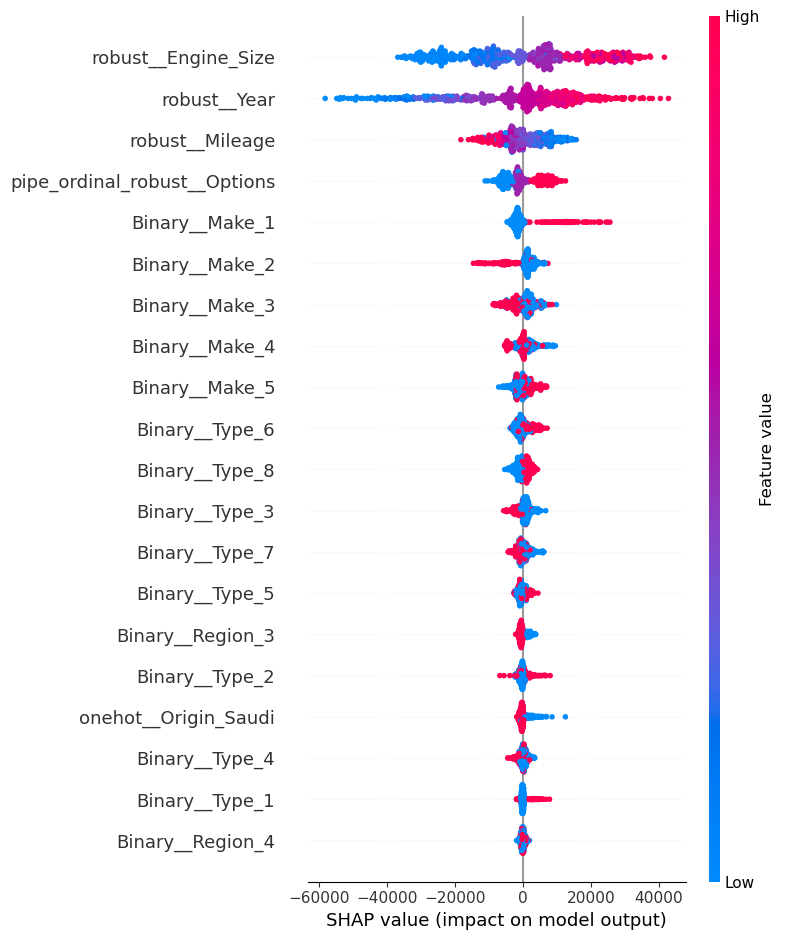

In [127]:
import shap


def explain_model_with_shap(pipeline, X_test, sample_size=1000, random_state=42):
    """
    Automatically selects SHAP explainer depending on the model type.
    
    Parameters:
    - pipeline: trained sklearn pipeline
    - X_test: raw test feature DataFrame
    - sample_size: number of samples to use for explanation (to reduce compute time)
    """
    # Extract steps
    preprocessor = pipeline.named_steps.get('preprocessing') or pipeline.named_steps.get('transformer')
    model = pipeline.named_steps.get('model') or pipeline.named_steps.get('modeling')
    
    # Transform X_test using preprocessor
    if preprocessor:
        X_test_transformed = preprocessor.transform(X_test)
        if hasattr(preprocessor, 'get_feature_names_out'):
            feature_names = preprocessor.get_feature_names_out()
        else:
            feature_names = [f'Feature {i}' for i in range(X_test_transformed.shape[1])]
    else:
        X_test_transformed = X_test.values
        feature_names = X_test.columns

    # Convert sparse to dense if needed
    if hasattr(X_test_transformed, 'toarray'):
        X_test_transformed = X_test_transformed.toarray()

    # Create DataFrame
    X_test_df = pd.DataFrame(X_test_transformed, columns=feature_names)
    X_sample = shap.sample(X_test_df, sample_size, random_state=random_state)

    # Choose appropriate SHAP explainer
    try:
        explainer = shap.Explainer(model, X_sample)
        shap_values = explainer(X_sample)
    except Exception as e:
        print(f"Falling back to KernelExplainer due to: {e}")
        explainer = shap.KernelExplainer(model.predict, X_sample)
        shap_values = explainer.shap_values(X_sample)

    # Plot summary
    shap.summary_plot(shap_values, X_sample, feature_names=feature_names)

# Example usage:
explain_model_with_shap(pipe_tune, X_test)


<div style="text-align: middle;">
  <h2 id="save-model-reg" style="background-color:rgb(5, 10, 63); color: white; padding: 10px 10px; margin-bottom: 10px; border-radius: 8px; font-weight: bold; display: inline-block; font-size: 20px">Save Model</h2>
</div>

In [129]:
import pickle

# Save model

#fit
best_model.fit(X, y)


filename = 'Prediction Model.sav'

# save with pickle
pickle.dump(best_model, open(f'dataset/{filename}', 'wb'))

# Load model
loaded_model = pickle.load(open(f'dataset/{filename}', 'rb'))
loaded_model

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipe_ordinal_robust',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder(mapping=[{'col': 'Options',
                                                                                            'data_type': dtype('O'),
                                                                                            'mapping': Standard     1
Semi Full    2
Full         3
dtype: int64}])),
                                                                  ('robust',
                                                                   RobustScaler())]),
                                                  ['Options']),
                                                 ('Binary', BinaryEncoder(),
                                                  ['Type', 'Region', 'Make']),
                                                 ('robust', RobustScaler(),
                                                  ['Mileage', 'Engine_Size',
                                                   'Year']),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['Gear_Type', 'Origin'])])),
                ('model',
                 <catboost.core.CatBoostRegressor object at 0x1687b6600>)])

In [130]:
y_test.iloc[0]

93500

In [131]:
loaded_model.predict(X_test.iloc[[0]])

array([91277.48950088])